In [ ]:
# ‚¨áÔ∏è Install (bitsandbytes pulls CUDA wheels automatically on Colab GPUs)
!pip -q install transformers accelerate bitsandbytes huggingface_hub --upgrade

# üîë Hugging Face login  ‚Äì safest via env-var or an input prompt
import os, getpass
from huggingface_hub import login

HF_TOKEN = os.getenv("HF_TOKEN")          # recommended:  !export HF_TOKEN=your_token
if not HF_TOKEN:
    HF_TOKEN = getpass.getpass("Enter your Hugging Face token: ")

login(token=HF_TOKEN)
print("‚úÖ Authenticated")


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10.5/10.5 MB 129.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 67.0/67.0 MB 37.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 512.1/512.1 kB 39.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5.2/5.2 MB 119.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 128.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [ ]:
import os, json, pickle, re
from collections import defaultdict

import pandas as pd
import torch
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from huggingface_hub import login

In [ ]:
import torch
import numpy as np
from collections import defaultdict
from tqdm import tqdm

In [ ]:
# OPTION A ‚Äì interactive upload (quick but resets every Colab restart)
from google.colab import files, drive

# files.upload() lets you choose multiple JSONs at once
uploaded = files.upload()   # pick your 4-5 JSON files
# they‚Äôll land in /content/

# OPTION B ‚Äì Google Drive (persistent)
# drive.mount("/content/drive")
# Then move / copy your JSONs inside /content/drive/MyDrive/...


Saving cnn_train_articles.json to cnn_train_articles.json
Saving cnn_train_gpt35_responses.json to cnn_train_gpt35_responses.json
Saving cnn_train_llama3.1-8b-instruct_responses.json to cnn_train_llama3.1-8b-instruct_responses.json
Saving cnn_train_llama3_8bchat_responses.json to cnn_train_llama3_8bchat_responses.json
Saving llama3.1-8b-instruct_comparison_results.json to llama3.1-8b-instruct_comparison_results.json
Saving steering_vectors_newbalancedtask3_meandiff.pkl to steering_vectors_newbalancedtask3_meandiff.pkl
Saving steering_vectors_newbalancedtask3_meandiff_projectoutnuisance.pkl to steering_vectors_newbalancedtask3_meandiff_projectoutnuisance.pkl
Saving vector_steering_neg_clean.json to vector_steering_neg_clean.json
Saving vector_steering_pos_clean.json to vector_steering_pos_clean.json
Saving vector_steering_samples.json to vector_steering_samples.json
Saving vector_steering_samples_full_balanced(1).json to vector_steering_samples_full_balanced(1).json


In [ ]:
uplodaded = files.upload()

Saving self_recog.json to self_recog.json


In [ ]:
import pathlib, shutil, os, json
base = pathlib.Path("/content/data")
(base / "articles").mkdir(parents=True, exist_ok=True)
(base / "summaries").mkdir(parents=True, exist_ok=True)

# move uploaded files to the new folders; adjust names as needed
uploaded_names = list(uploaded.keys())   # filenames you just uploaded
mapping = {
    "cnn_train_articles.json":           base / "articles/cnn_train_articles.json",
    "cnn_train_llama3.1-8b-instruct_responses.json": base / "summaries/cnn_train_llama3.1-8b-instruct_responses.json",
    "cnn_train_gpt35_responses.json":    base / "summaries/cnn_train_gpt35_responses.json",
    "vector_steering_pos_clean.json":    base / "vector_steering_pos_clean.json",
    "vector_steering_neg_clean.json":    base / "vector_steering_neg_clean.json",
    "vector_steering_samples.json":      base / "vector_steering_samples_full_balanced.json"
}
for fname, dest in mapping.items():
    if os.path.exists(fname):
        shutil.move(fname, dest)
ROOT = "/content/data"
ARTICLE_JSON  = f"{ROOT}/articles/cnn_train_articles.json"
SELF_JSON     = f"{ROOT}/summaries/cnn_train_llama3.1-8b-instruct_responses.json"
HUMAN_JSON    = f"{ROOT}/summaries/cnn_train_gpt35_responses.json"
POS_JSON = f"{ROOT}/vector_steering_pos_clean.json"
NEG_JSON = f"{ROOT}/vector_steering_neg_clean.json"
#PROMPTS_JSON = f"{ROOT}/vector_steering_samples_full_balanced.json"
PROMPTS_JSON = "/content/vector_steering_samples_full_balanced(1).json"
#PROMPTS_JSON = "/content/self_recog.json"
OUT_DIR = "/content/vectors"
os.makedirs(OUT_DIR, exist_ok=True)

MODEL_ID = "meta-llama/Meta-Llama-3.1-8B-Instruct"
print("üìÇ Data files in place")
with open(ARTICLE_JSON) as f:           articles        = json.load(f)
with open(SELF_JSON)    as f:           self_summaries  = json.load(f)
with open(HUMAN_JSON)   as f:           other_summaries = json.load(f)
with open(POS_JSON)     as f:           meta_pos        = json.load(f)
with open(NEG_JSON)     as f:           meta_neg        = json.load(f)
with open(PROMPTS_JSON) as f:           meta_prompts   = json.load(f)

print("File counts:",
      len(articles), len(self_summaries),
      len(other_summaries), len(meta_pos) + len(meta_neg))



üìÇ Data files in place
File counts: 1000 1000 1000 310


In [ ]:

# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# 4.  Load Llama-3 in 8-bit
# ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
quant_cfg = BitsAndBytesConfig(load_in_8bit=True)

tok   = AutoTokenizer.from_pretrained(MODEL_ID, token=HF_TOKEN)
model = AutoModelForCausalLM.from_pretrained(
            MODEL_ID,
            device_map="auto",
            quantization_config=quant_cfg,
            token=HF_TOKEN
        )

if tok.pad_token is None:
    tok.pad_token = tok.eos_token
    model.resize_token_embeddings(len(tok))
model.config.pad_token_id = tok.pad_token_id
model.eval()

L = model.config.num_hidden_layers

tokenizer_config.json:   0%|          | 0.00/55.4k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

In [ ]:

# ‚îÄ‚îÄ‚îÄ Extract ‚Äúpos‚Äù and ‚Äúneg‚Äù buckets ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
pos_bucket = meta_prompts.get("pos", {})
neg_bucket = meta_prompts.get("neg", {})

# ‚îÄ‚îÄ‚îÄ Helper to count entries whether bucket is a dict or a list ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
def count_entries(bucket):
    if isinstance(bucket, dict):
        return len(bucket)
    elif isinstance(bucket, list):
        return len(bucket)
    else:
        return 0

pos_count = count_entries(pos_bucket)
neg_count = count_entries(neg_bucket)

# ‚îÄ‚îÄ‚îÄ Build a DataFrame showing how many ‚Äúpos‚Äù vs. ‚Äúneg‚Äù items there are ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
df_counts = pd.DataFrame({
    "bucket": ["pos", "neg"],
    "count": [pos_count, neg_count]
})

print(df_counts)



  bucket  count
0    pos    155
1    neg    155


In [ ]:
count = 0
for k in meta_pos.keys():
    count = count + 1
print(count)

count = 0
for k in meta_neg.keys():
    count = count + 1
print(count)

155
155


In [ ]:
import pandas as pd
import random

# ‚îÄ‚îÄ‚îÄ Helper function to extract rows from one bucket (pos or neg) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
def gather_rows_from_bucket(bucket_name):
    """
    Inspect meta_prompts[bucket_name]. It may be:
      - a dict mapping key ‚Üí entry_dict
      - a list of entry_dicts, each of which must have "key"
    We return a list of row‚Äêdicts with fields: key, forward_prompt, backward_prompt, label, pref.
    """
    rows = []
    bucket = meta_prompts.get(bucket_name, {})

    if isinstance(bucket, dict):
        # Case A: bucket is a dict: key ‚Üí entry_dict
        for k, entry in bucket.items():
            # Each entry should be a dict containing forward/backward prompts
            fwd = entry.get("forward_prompt", "").strip()
            bwd = entry.get("backward_prompt", "").strip()
            pref = float(entry.get("self_preference", 0.0))

            # Skip if both prompts are empty
            if not (fwd or bwd):
                print(k)
                continue

            rows.append({
                "key":             k,
                "forward_prompt":  fwd,
                "backward_prompt": bwd,
                "label":           "Yes" if bucket_name == "pos" else "No",
                "pref":            pref
            })

    elif isinstance(bucket, list):
        # Case B: bucket is a list of dicts, each with a "key" field
        for entry in bucket:
            if not isinstance(entry, dict): #ISSUE HERE
                #print("a")
                continue
            if "key" not in entry:
                print("b")
                #continue

            k   = entry["key"]
            fwd = entry.get("forward_prompt", "").strip()
            bwd = entry.get("backward_prompt", "").strip()
            pref = float(entry.get("self_preference", 0.0))

            if not (fwd or bwd):
                print(k)
                continue

            rows.append({
                "key":             k,
                "forward_prompt":  fwd,
                "backward_prompt": bwd,
                "label":           "Yes" if bucket_name == "pos" else "No",
                "pref":            pref
            })

    else:
        # Neither dict nor list ‚áí nothing to gather
        pass

    return rows

# ‚îÄ‚îÄ‚îÄ 1) Gather ‚ÄúYes‚Äù rows from meta_prompts["pos"] ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
yes_rows = gather_rows_from_bucket("pos")
print(f"Found {len(yes_rows)} valid ‚ÄòYes‚Äô rows (non‚Äêempty prompt).")

# ‚îÄ‚îÄ‚îÄ 2) Gather ‚ÄúNo‚Äù rows from meta_prompts["neg"] ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
no_rows = gather_rows_from_bucket("neg")
print(f"Found {len(no_rows)} valid ‚ÄòNo‚Äô rows (non‚Äêempty prompt).")

# ‚îÄ‚îÄ‚îÄ 3) Balance sizes by truncating the larger list to the smaller size ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
n_yes = len(yes_rows)
n_no  = len(no_rows)
n_keep = min(n_yes, n_no)

if n_yes != n_no:
    print(f"Warning: {n_yes} ‚ÄòYes‚Äô rows vs. {n_no} ‚ÄòNo‚Äô rows. Downsampling to {n_keep} each.")

random.shuffle(yes_rows)
random.shuffle(no_rows)
yes_rows = yes_rows[:n_keep]
no_rows  = no_rows[:n_keep]

# ‚îÄ‚îÄ‚îÄ 4) Create the DataFrame and shuffle ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
balanced = pd.DataFrame(yes_rows + no_rows)
balanced = balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("Final balanced DataFrame shape:", balanced.shape)
print("# Yes:", (balanced.label == "Yes").sum(), "| # No:", (balanced.label == "No").sum())

# ‚îÄ‚îÄ‚îÄ 5) (Optional) Export to CSV for inspection ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
balanced.to_csv("balanced_inspect_from_meta.csv", index=False)
print("Wrote balanced_inspect_from_meta.csv. Open to verify no empty prompts on any row.")


Found 155 valid ‚ÄòYes‚Äô rows (non‚Äêempty prompt).
Found 155 valid ‚ÄòNo‚Äô rows (non‚Äêempty prompt).
Final balanced DataFrame shape: (310, 5)
# Yes: 155 | # No: 155
Wrote balanced_inspect_from_meta.csv. Open to verify no empty prompts on any row.


In [ ]:
import numpy as np
import torch
from tqdm import tqdm
from collections import defaultdict

# ‚îÄ‚îÄ‚îÄ PARAMETERS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
L      = model.config.num_hidden_layers   # e.g. 32
K      = 10                                # last‚ÄêK token positions
hidden = model.config.hidden_size

# ‚îÄ‚îÄ‚îÄ (A) VALIDATE BALANCED DATASET ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
counts = balanced["label"].value_counts()
assert counts["Yes"] == counts["No"], "Balanced must have equal Yes/No"
n_yes = int(counts["Yes"])
n_no  = int(counts["No"])

# ‚îÄ‚îÄ‚îÄ (B) SHUFFLE AND SPLIT INDICES FOR 25/25/25/25 ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# Gather indices for each label
yes_idxs = balanced[ balanced["label"] == "Yes" ].index.to_list()
no_idxs  = balanced[ balanced["label"] == "No"  ].index.to_list()

# Shuffle in place
np.random.shuffle(yes_idxs)
np.random.shuffle(no_idxs)

# Split each label half for A vs. B
half_yes = n_yes // 2   # e.g. 155//2 = 77
half_no  = n_no  // 2   # e.g. 155//2 = 77

yes_A = set(yes_idxs[:half_yes])
yes_B = set(yes_idxs[half_yes:])
no_A  = set(no_idxs[:half_no])
no_B  = set(no_idxs[half_no:])

# ‚îÄ‚îÄ‚îÄ (C) INITIALIZE ACCUMULATORS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
sums_yes = {l: [torch.zeros(hidden) for _ in range(K)] for l in range(L)}
sums_no  = {l: [torch.zeros(hidden) for _ in range(K)] for l in range(L)}

# ‚îÄ‚îÄ‚îÄ (D) COLLECT HIDDEN ACTIVATIONS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
for idx, row in tqdm(balanced.iterrows(), total=len(balanced)):
    # Determine forward/backward based on group membership
    if   idx in yes_A:
        prompt = row["forward_prompt"]
    elif idx in yes_B:
        prompt = row["backward_prompt"]
    elif idx in no_A:
        prompt = row["forward_prompt"]
    else:  # idx in no_B
        prompt = row["backward_prompt"]

    # Tokenize (without returning tensors just yet)
    enc       = tok(prompt, add_special_tokens=True, return_tensors=None)
    token_ids = enc["input_ids"]

    # ‚îÄ‚îÄ‚îÄ PRINT LAST TEN TOKENS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
    last_ten_ids     = token_ids[-10:]
    last_ten_strings = tok.convert_ids_to_tokens(last_ten_ids)
    print(f"\nIndex {idx} ({'Yes' if row['label']=='Yes' else 'No'}), Layer‚ÄêOffset loop:")
    print(f"  Last 10 token IDs:      {last_ten_ids}")
    print(f"  Last 10 token strings:  {last_ten_strings}\n")

    n_tok = min(K, len(token_ids))

    with torch.no_grad():
        out = model(
            **tok(prompt, return_tensors="pt").to(model.device),
            output_hidden_states=True
        )
        hs = out.hidden_states  # hs[1]..hs[L] are layer activations

    for offset in range(n_tok):  # offset=0 is last token
        vecs = [hs[l + 1][0, -(offset + 1), :].cpu() for l in range(L)]
        if row["label"] == "Yes":
            for l, v in enumerate(vecs):
                sums_yes[l][offset] += v
        else:  # "No"
            for l, v in enumerate(vecs):
                sums_no[l][offset] += v

# ‚îÄ‚îÄ‚îÄ (E) COMPUTE NORMALIZED MEAN‚ÄêDIFF VECTORS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
layer_diffs = defaultdict(list)

for l in range(L):
    for offset in range(K):
        # Mean of all "Yes" activations at (layer l, offset)
        mean_yes = sums_yes[l][offset] / n_yes
        # Mean of all "No"  activations at (layer l, offset)
        mean_no  = sums_no[l][offset]  / n_no

        diff = mean_yes - mean_no
        #norm = diff.norm()
        #diff = diff / norm
        layer_diffs[l].append(diff)

total = sum(len(v) for v in layer_diffs.values())
print(f"‚úì Created {total} steering vectors ({L} layers √ó up to {K} offsets each)")


  0%|          | 0/310 [00:00<?, ?it/s]


Index 0 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  0%|          | 1/310 [00:00<01:24,  3.65it/s]


Index 1 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  1%|          | 2/310 [00:00<01:21,  3.80it/s]


Index 2 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  1%|          | 3/310 [00:00<01:20,  3.81it/s]


Index 3 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  1%|‚ñè         | 4/310 [00:01<01:21,  3.76it/s]


Index 4 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  2%|‚ñè         | 5/310 [00:01<01:21,  3.76it/s]


Index 5 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  2%|‚ñè         | 6/310 [00:01<01:19,  3.81it/s]


Index 6 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  2%|‚ñè         | 7/310 [00:01<01:20,  3.77it/s]


Index 7 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  3%|‚ñé         | 8/310 [00:02<01:20,  3.75it/s]


Index 8 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  3%|‚ñé         | 9/310 [00:02<01:20,  3.73it/s]


Index 9 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  3%|‚ñé         | 10/310 [00:02<01:18,  3.82it/s]


Index 10 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  4%|‚ñé         | 11/310 [00:02<01:18,  3.81it/s]


Index 11 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  4%|‚ñç         | 12/310 [00:03<01:19,  3.74it/s]


Index 12 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  4%|‚ñç         | 13/310 [00:03<01:20,  3.70it/s]


Index 13 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  5%|‚ñç         | 14/310 [00:03<01:23,  3.55it/s]


Index 14 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  5%|‚ñç         | 15/310 [00:04<01:19,  3.69it/s]


Index 15 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  5%|‚ñå         | 16/310 [00:04<01:22,  3.55it/s]


Index 16 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  5%|‚ñå         | 17/310 [00:04<01:20,  3.65it/s]


Index 17 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  6%|‚ñå         | 18/310 [00:04<01:21,  3.57it/s]


Index 18 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  6%|‚ñå         | 19/310 [00:05<01:20,  3.59it/s]


Index 19 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  6%|‚ñã         | 20/310 [00:05<01:23,  3.48it/s]


Index 20 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  7%|‚ñã         | 21/310 [00:05<01:20,  3.57it/s]


Index 21 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  7%|‚ñã         | 22/310 [00:05<01:17,  3.71it/s]


Index 22 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  7%|‚ñã         | 23/310 [00:06<01:16,  3.74it/s]


Index 23 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  8%|‚ñä         | 24/310 [00:06<01:15,  3.81it/s]


Index 24 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  8%|‚ñä         | 25/310 [00:06<01:15,  3.76it/s]


Index 25 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  8%|‚ñä         | 26/310 [00:07<01:13,  3.84it/s]


Index 26 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  9%|‚ñä         | 27/310 [00:07<01:15,  3.75it/s]


Index 27 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  9%|‚ñâ         | 28/310 [00:07<01:13,  3.83it/s]


Index 28 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



  9%|‚ñâ         | 29/310 [00:07<01:12,  3.89it/s]


Index 29 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 10%|‚ñâ         | 30/310 [00:08<01:12,  3.84it/s]


Index 30 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 10%|‚ñà         | 31/310 [00:08<01:13,  3.81it/s]


Index 31 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 10%|‚ñà         | 32/310 [00:08<01:14,  3.71it/s]


Index 32 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 11%|‚ñà         | 33/310 [00:08<01:13,  3.78it/s]


Index 33 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 11%|‚ñà         | 34/310 [00:09<01:11,  3.87it/s]


Index 34 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 11%|‚ñà‚ñè        | 35/310 [00:09<01:15,  3.66it/s]


Index 35 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 12%|‚ñà‚ñè        | 36/310 [00:09<01:14,  3.67it/s]


Index 36 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 12%|‚ñà‚ñè        | 37/310 [00:09<01:13,  3.73it/s]


Index 37 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 12%|‚ñà‚ñè        | 38/310 [00:10<01:11,  3.79it/s]


Index 38 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 13%|‚ñà‚ñé        | 39/310 [00:10<01:11,  3.81it/s]


Index 39 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 13%|‚ñà‚ñé        | 40/310 [00:10<01:11,  3.76it/s]


Index 40 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 13%|‚ñà‚ñé        | 41/310 [00:10<01:10,  3.79it/s]


Index 41 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 14%|‚ñà‚ñé        | 42/310 [00:11<01:09,  3.86it/s]


Index 42 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 14%|‚ñà‚ñç        | 43/310 [00:11<01:08,  3.91it/s]


Index 43 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 14%|‚ñà‚ñç        | 44/310 [00:11<01:08,  3.88it/s]


Index 44 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 15%|‚ñà‚ñç        | 45/310 [00:11<01:08,  3.88it/s]


Index 45 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 15%|‚ñà‚ñç        | 46/310 [00:12<01:11,  3.67it/s]


Index 46 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 15%|‚ñà‚ñå        | 47/310 [00:12<01:10,  3.73it/s]


Index 47 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 15%|‚ñà‚ñå        | 48/310 [00:12<01:10,  3.74it/s]


Index 48 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 16%|‚ñà‚ñå        | 49/310 [00:13<01:10,  3.71it/s]


Index 49 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 16%|‚ñà‚ñå        | 50/310 [00:13<01:11,  3.63it/s]


Index 50 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 16%|‚ñà‚ñã        | 51/310 [00:13<01:09,  3.73it/s]


Index 51 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 17%|‚ñà‚ñã        | 52/310 [00:13<01:07,  3.82it/s]


Index 52 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 17%|‚ñà‚ñã        | 53/310 [00:14<01:06,  3.89it/s]


Index 53 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 17%|‚ñà‚ñã        | 54/310 [00:14<01:05,  3.91it/s]


Index 54 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 18%|‚ñà‚ñä        | 55/310 [00:14<01:04,  3.96it/s]


Index 55 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 18%|‚ñà‚ñä        | 56/310 [00:14<01:04,  3.94it/s]


Index 56 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 18%|‚ñà‚ñä        | 57/310 [00:15<01:03,  3.98it/s]


Index 57 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 19%|‚ñà‚ñä        | 58/310 [00:15<01:02,  4.01it/s]


Index 58 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 19%|‚ñà‚ñâ        | 59/310 [00:15<01:08,  3.69it/s]


Index 59 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 19%|‚ñà‚ñâ        | 60/310 [00:15<01:07,  3.69it/s]


Index 60 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 20%|‚ñà‚ñâ        | 61/310 [00:16<01:07,  3.69it/s]


Index 61 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 20%|‚ñà‚ñà        | 62/310 [00:16<01:05,  3.77it/s]


Index 62 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 20%|‚ñà‚ñà        | 63/310 [00:16<01:06,  3.71it/s]


Index 63 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 21%|‚ñà‚ñà        | 64/310 [00:17<01:04,  3.83it/s]


Index 64 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 21%|‚ñà‚ñà        | 65/310 [00:17<01:03,  3.88it/s]


Index 65 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 21%|‚ñà‚ñà‚ñè       | 66/310 [00:17<01:02,  3.90it/s]


Index 66 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 22%|‚ñà‚ñà‚ñè       | 67/310 [00:17<01:01,  3.96it/s]


Index 67 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 22%|‚ñà‚ñà‚ñè       | 68/310 [00:18<01:01,  3.92it/s]


Index 68 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 22%|‚ñà‚ñà‚ñè       | 69/310 [00:18<01:01,  3.92it/s]


Index 69 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 23%|‚ñà‚ñà‚ñé       | 70/310 [00:18<01:00,  3.94it/s]


Index 70 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 23%|‚ñà‚ñà‚ñé       | 71/310 [00:18<01:01,  3.87it/s]


Index 71 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 23%|‚ñà‚ñà‚ñé       | 72/310 [00:19<01:02,  3.80it/s]


Index 72 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 24%|‚ñà‚ñà‚ñé       | 73/310 [00:19<01:04,  3.67it/s]


Index 73 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 24%|‚ñà‚ñà‚ñç       | 74/310 [00:19<01:04,  3.69it/s]


Index 74 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 24%|‚ñà‚ñà‚ñç       | 75/310 [00:19<01:02,  3.76it/s]


Index 75 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 25%|‚ñà‚ñà‚ñç       | 76/310 [00:20<01:01,  3.79it/s]


Index 76 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 25%|‚ñà‚ñà‚ñç       | 77/310 [00:20<01:01,  3.77it/s]


Index 77 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 25%|‚ñà‚ñà‚ñå       | 78/310 [00:20<01:02,  3.70it/s]


Index 78 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 25%|‚ñà‚ñà‚ñå       | 79/310 [00:20<01:02,  3.72it/s]


Index 79 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 26%|‚ñà‚ñà‚ñå       | 80/310 [00:21<01:00,  3.83it/s]


Index 80 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 26%|‚ñà‚ñà‚ñå       | 81/310 [00:21<00:58,  3.91it/s]


Index 81 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 26%|‚ñà‚ñà‚ñã       | 82/310 [00:21<00:58,  3.88it/s]


Index 82 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 27%|‚ñà‚ñà‚ñã       | 83/310 [00:21<00:57,  3.92it/s]


Index 83 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 27%|‚ñà‚ñà‚ñã       | 84/310 [00:22<00:57,  3.94it/s]


Index 84 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 27%|‚ñà‚ñà‚ñã       | 85/310 [00:22<00:57,  3.89it/s]


Index 85 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 28%|‚ñà‚ñà‚ñä       | 86/310 [00:22<00:58,  3.83it/s]


Index 86 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 28%|‚ñà‚ñà‚ñä       | 87/310 [00:22<00:57,  3.87it/s]


Index 87 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 28%|‚ñà‚ñà‚ñä       | 88/310 [00:23<00:57,  3.89it/s]


Index 88 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 29%|‚ñà‚ñà‚ñä       | 89/310 [00:23<00:57,  3.86it/s]


Index 89 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 29%|‚ñà‚ñà‚ñâ       | 90/310 [00:23<01:00,  3.65it/s]


Index 90 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 29%|‚ñà‚ñà‚ñâ       | 91/310 [00:24<00:58,  3.73it/s]


Index 91 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 30%|‚ñà‚ñà‚ñâ       | 92/310 [00:24<00:57,  3.81it/s]


Index 92 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 30%|‚ñà‚ñà‚ñà       | 93/310 [00:24<00:55,  3.89it/s]


Index 93 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 30%|‚ñà‚ñà‚ñà       | 94/310 [00:24<00:55,  3.89it/s]


Index 94 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 31%|‚ñà‚ñà‚ñà       | 95/310 [00:25<00:55,  3.86it/s]


Index 95 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 31%|‚ñà‚ñà‚ñà       | 96/310 [00:25<00:55,  3.88it/s]


Index 96 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 31%|‚ñà‚ñà‚ñà‚ñè      | 97/310 [00:25<00:55,  3.85it/s]


Index 97 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 32%|‚ñà‚ñà‚ñà‚ñè      | 98/310 [00:25<00:54,  3.92it/s]


Index 98 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 32%|‚ñà‚ñà‚ñà‚ñè      | 99/310 [00:26<00:56,  3.72it/s]


Index 99 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 32%|‚ñà‚ñà‚ñà‚ñè      | 100/310 [00:26<00:57,  3.65it/s]


Index 100 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 33%|‚ñà‚ñà‚ñà‚ñé      | 101/310 [00:26<00:57,  3.65it/s]


Index 101 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 33%|‚ñà‚ñà‚ñà‚ñé      | 102/310 [00:26<00:56,  3.66it/s]


Index 102 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 33%|‚ñà‚ñà‚ñà‚ñé      | 103/310 [00:27<00:59,  3.47it/s]


Index 103 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 34%|‚ñà‚ñà‚ñà‚ñé      | 104/310 [00:27<00:56,  3.63it/s]


Index 104 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 34%|‚ñà‚ñà‚ñà‚ñç      | 105/310 [00:27<00:55,  3.68it/s]


Index 105 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 34%|‚ñà‚ñà‚ñà‚ñç      | 106/310 [00:28<00:58,  3.47it/s]


Index 106 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 35%|‚ñà‚ñà‚ñà‚ñç      | 107/310 [00:28<00:57,  3.54it/s]


Index 107 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 35%|‚ñà‚ñà‚ñà‚ñç      | 108/310 [00:28<00:54,  3.70it/s]


Index 108 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 35%|‚ñà‚ñà‚ñà‚ñå      | 109/310 [00:28<00:52,  3.79it/s]


Index 109 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 35%|‚ñà‚ñà‚ñà‚ñå      | 110/310 [00:29<00:52,  3.80it/s]


Index 110 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 36%|‚ñà‚ñà‚ñà‚ñå      | 111/310 [00:29<00:51,  3.83it/s]


Index 111 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 36%|‚ñà‚ñà‚ñà‚ñå      | 112/310 [00:29<00:52,  3.79it/s]


Index 112 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 36%|‚ñà‚ñà‚ñà‚ñã      | 113/310 [00:29<00:52,  3.76it/s]


Index 113 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 37%|‚ñà‚ñà‚ñà‚ñã      | 114/310 [00:30<00:52,  3.73it/s]


Index 114 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 37%|‚ñà‚ñà‚ñà‚ñã      | 115/310 [00:30<00:52,  3.74it/s]


Index 115 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 37%|‚ñà‚ñà‚ñà‚ñã      | 116/310 [00:30<00:51,  3.80it/s]


Index 116 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 38%|‚ñà‚ñà‚ñà‚ñä      | 117/310 [00:31<00:50,  3.82it/s]


Index 117 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 38%|‚ñà‚ñà‚ñà‚ñä      | 118/310 [00:31<00:49,  3.87it/s]


Index 118 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 38%|‚ñà‚ñà‚ñà‚ñä      | 119/310 [00:31<00:49,  3.86it/s]


Index 119 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 39%|‚ñà‚ñà‚ñà‚ñä      | 120/310 [00:31<00:49,  3.86it/s]


Index 120 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 39%|‚ñà‚ñà‚ñà‚ñâ      | 121/310 [00:32<00:48,  3.90it/s]


Index 121 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 39%|‚ñà‚ñà‚ñà‚ñâ      | 122/310 [00:32<00:47,  3.94it/s]


Index 122 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 40%|‚ñà‚ñà‚ñà‚ñâ      | 123/310 [00:32<00:47,  3.96it/s]


Index 123 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 40%|‚ñà‚ñà‚ñà‚ñà      | 124/310 [00:32<00:47,  3.91it/s]


Index 124 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 40%|‚ñà‚ñà‚ñà‚ñà      | 125/310 [00:33<00:48,  3.83it/s]


Index 125 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 41%|‚ñà‚ñà‚ñà‚ñà      | 126/310 [00:33<00:48,  3.77it/s]


Index 126 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 41%|‚ñà‚ñà‚ñà‚ñà      | 127/310 [00:33<00:47,  3.84it/s]


Index 127 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 41%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 128/310 [00:33<00:48,  3.78it/s]


Index 128 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 129/310 [00:34<00:48,  3.74it/s]


Index 129 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 130/310 [00:34<00:52,  3.40it/s]


Index 130 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 42%|‚ñà‚ñà‚ñà‚ñà‚ñè     | 131/310 [00:34<00:50,  3.56it/s]


Index 131 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 132/310 [00:35<00:49,  3.59it/s]


Index 132 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 133/310 [00:35<00:49,  3.57it/s]


Index 133 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 43%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 134/310 [00:35<00:48,  3.62it/s]


Index 134 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 44%|‚ñà‚ñà‚ñà‚ñà‚ñé     | 135/310 [00:35<00:48,  3.58it/s]


Index 135 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 136/310 [00:36<00:49,  3.53it/s]


Index 136 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 44%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 137/310 [00:36<00:48,  3.58it/s]


Index 137 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 138/310 [00:36<00:47,  3.63it/s]


Index 138 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 45%|‚ñà‚ñà‚ñà‚ñà‚ñç     | 139/310 [00:36<00:45,  3.72it/s]


Index 139 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 140/310 [00:37<00:46,  3.68it/s]


Index 140 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 45%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 141/310 [00:37<00:44,  3.79it/s]


Index 141 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 142/310 [00:37<00:44,  3.80it/s]


Index 142 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 46%|‚ñà‚ñà‚ñà‚ñà‚ñå     | 143/310 [00:38<00:47,  3.50it/s]


Index 143 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 46%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 144/310 [00:38<00:45,  3.64it/s]


Index 144 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 145/310 [00:38<00:44,  3.74it/s]


Index 145 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 146/310 [00:38<00:43,  3.75it/s]


Index 146 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 47%|‚ñà‚ñà‚ñà‚ñà‚ñã     | 147/310 [00:39<00:43,  3.73it/s]


Index 147 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 148/310 [00:39<00:42,  3.81it/s]


Index 148 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 149/310 [00:39<00:42,  3.80it/s]


Index 149 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 48%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 150/310 [00:39<00:41,  3.88it/s]


Index 150 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 49%|‚ñà‚ñà‚ñà‚ñà‚ñä     | 151/310 [00:40<00:41,  3.86it/s]


Index 151 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 152/310 [00:40<00:41,  3.82it/s]


Index 152 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 49%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 153/310 [00:40<00:40,  3.90it/s]


Index 153 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 50%|‚ñà‚ñà‚ñà‚ñà‚ñâ     | 154/310 [00:40<00:42,  3.69it/s]


Index 154 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 155/310 [00:41<00:42,  3.66it/s]


Index 155 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 50%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 156/310 [00:41<00:41,  3.73it/s]


Index 156 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 157/310 [00:41<00:40,  3.73it/s]


Index 157 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 51%|‚ñà‚ñà‚ñà‚ñà‚ñà     | 158/310 [00:42<00:41,  3.68it/s]


Index 158 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 51%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 159/310 [00:42<00:39,  3.79it/s]


Index 159 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 160/310 [00:42<00:39,  3.83it/s]


Index 160 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 161/310 [00:42<00:40,  3.70it/s]


Index 161 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 52%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè    | 162/310 [00:43<00:40,  3.63it/s]


Index 162 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 163/310 [00:43<00:40,  3.66it/s]


Index 163 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 164/310 [00:43<00:38,  3.75it/s]


Index 164 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 165/310 [00:43<00:37,  3.83it/s]


Index 165 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 166/310 [00:44<00:38,  3.71it/s]


Index 166 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 167/310 [00:44<00:37,  3.77it/s]


Index 167 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 54%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 168/310 [00:44<00:36,  3.87it/s]


Index 168 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 169/310 [00:44<00:35,  3.94it/s]


Index 169 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç    | 170/310 [00:45<00:35,  3.93it/s]


Index 170 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 171/310 [00:45<00:35,  3.93it/s]


Index 171 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 55%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 172/310 [00:45<00:35,  3.84it/s]


Index 172 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 173/310 [00:45<00:37,  3.67it/s]


Index 173 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå    | 174/310 [00:46<00:36,  3.77it/s]


Index 174 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 56%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 175/310 [00:46<00:36,  3.70it/s]


Index 175 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 176/310 [00:46<00:36,  3.70it/s]


Index 176 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 177/310 [00:47<00:35,  3.73it/s]


Index 177 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 57%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã    | 178/310 [00:47<00:36,  3.61it/s]


Index 178 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 179/310 [00:47<00:36,  3.62it/s]


Index 179 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 180/310 [00:47<00:35,  3.71it/s]


Index 180 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 58%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 181/310 [00:48<00:33,  3.79it/s]


Index 181 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä    | 182/310 [00:48<00:33,  3.77it/s]


Index 182 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 183/310 [00:48<00:33,  3.82it/s]


Index 183 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 59%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 184/310 [00:48<00:32,  3.86it/s]


Index 184 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ    | 185/310 [00:49<00:32,  3.81it/s]


Index 185 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 186/310 [00:49<00:32,  3.80it/s]


Index 186 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 187/310 [00:49<00:32,  3.82it/s]


Index 187 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 188/310 [00:49<00:32,  3.81it/s]


Index 188 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà    | 189/310 [00:50<00:31,  3.89it/s]


Index 189 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 61%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 190/310 [00:50<00:30,  3.90it/s]


Index 190 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 191/310 [00:50<00:30,  3.84it/s]


Index 191 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 192/310 [00:51<00:32,  3.62it/s]


Index 192 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 62%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 193/310 [00:51<00:32,  3.65it/s]


Index 193 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 194/310 [00:51<00:30,  3.75it/s]


Index 194 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 195/310 [00:51<00:30,  3.77it/s]


Index 195 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 63%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 196/310 [00:52<00:29,  3.85it/s]


Index 196 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé   | 197/310 [00:52<00:28,  3.90it/s]


Index 197 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 198/310 [00:52<00:28,  3.91it/s]


Index 198 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 64%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 199/310 [00:52<00:28,  3.87it/s]


Index 199 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 200/310 [00:53<00:29,  3.73it/s]


Index 200 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç   | 201/310 [00:53<00:29,  3.65it/s]


Index 201 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 202/310 [00:53<00:28,  3.73it/s]


Index 202 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 65%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 203/310 [00:53<00:28,  3.79it/s]


Index 203 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 204/310 [00:54<00:27,  3.79it/s]


Index 204 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå   | 205/310 [00:54<00:27,  3.77it/s]


Index 205 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 66%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 206/310 [00:54<00:28,  3.64it/s]


Index 206 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 207/310 [00:55<00:28,  3.60it/s]


Index 207 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 208/310 [00:55<00:27,  3.70it/s]


Index 208 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 67%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã   | 209/310 [00:55<00:27,  3.68it/s]


Index 209 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 210/310 [00:55<00:26,  3.74it/s]


Index 210 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 211/310 [00:56<00:26,  3.71it/s]


Index 211 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 68%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 212/310 [00:56<00:26,  3.77it/s]


Index 212 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä   | 213/310 [00:56<00:25,  3.77it/s]


Index 213 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 214/310 [00:56<00:24,  3.84it/s]


Index 214 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 69%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 215/310 [00:57<00:24,  3.84it/s]


Index 215 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ   | 216/310 [00:57<00:25,  3.69it/s]


Index 216 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 217/310 [00:57<00:25,  3.64it/s]


Index 217 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 218/310 [00:57<00:25,  3.65it/s]


Index 218 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 219/310 [00:58<00:24,  3.66it/s]


Index 219 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà   | 220/310 [00:58<00:24,  3.67it/s]


Index 220 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 71%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 221/310 [00:58<00:24,  3.66it/s]


Index 221 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 222/310 [00:59<00:23,  3.74it/s]


Index 222 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 223/310 [00:59<00:23,  3.77it/s]


Index 223 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 72%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè  | 224/310 [00:59<00:23,  3.74it/s]


Index 224 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 225/310 [00:59<00:22,  3.81it/s]


Index 225 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 226/310 [01:00<00:21,  3.88it/s]


Index 226 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 73%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 227/310 [01:00<00:21,  3.84it/s]


Index 227 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé  | 228/310 [01:00<00:21,  3.83it/s]


Index 228 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 229/310 [01:00<00:21,  3.80it/s]


Index 229 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 74%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 230/310 [01:01<00:22,  3.57it/s]


Index 230 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 231/310 [01:01<00:22,  3.56it/s]


Index 231 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç  | 232/310 [01:01<00:21,  3.63it/s]


Index 232 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 233/310 [01:02<00:21,  3.57it/s]


Index 233 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 75%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 234/310 [01:02<00:21,  3.48it/s]


Index 234 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 235/310 [01:02<00:21,  3.48it/s]


Index 235 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå  | 236/310 [01:02<00:22,  3.36it/s]


Index 236 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 76%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 237/310 [01:03<00:20,  3.54it/s]


Index 237 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 238/310 [01:03<00:19,  3.70it/s]


Index 238 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 239/310 [01:03<00:18,  3.80it/s]


Index 239 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 77%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã  | 240/310 [01:03<00:18,  3.76it/s]


Index 240 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 241/310 [01:04<00:17,  3.85it/s]


Index 241 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 242/310 [01:04<00:17,  3.90it/s]


Index 242 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 78%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 243/310 [01:04<00:16,  3.97it/s]


Index 243 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä  | 244/310 [01:04<00:16,  3.96it/s]


Index 244 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 245/310 [01:05<00:17,  3.77it/s]


Index 245 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 79%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 246/310 [01:05<00:17,  3.74it/s]


Index 246 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ  | 247/310 [01:05<00:17,  3.54it/s]


Index 247 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 248/310 [01:06<00:17,  3.64it/s]


Index 248 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 80%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 249/310 [01:06<00:16,  3.70it/s]


Index 249 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 250/310 [01:06<00:16,  3.72it/s]


Index 250 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà  | 251/310 [01:06<00:15,  3.72it/s]


Index 251 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 252/310 [01:07<00:15,  3.64it/s]


Index 252 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 253/310 [01:07<00:15,  3.72it/s]


Index 253 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 254/310 [01:07<00:14,  3.76it/s]


Index 254 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 82%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 255/310 [01:07<00:14,  3.82it/s]


Index 255 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 256/310 [01:08<00:15,  3.59it/s]


Index 256 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 257/310 [01:08<00:14,  3.64it/s]


Index 257 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 83%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 258/310 [01:08<00:13,  3.76it/s]


Index 258 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé | 259/310 [01:09<00:13,  3.86it/s]


Index 259 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 260/310 [01:09<00:13,  3.84it/s]


Index 260 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 84%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 261/310 [01:09<00:13,  3.51it/s]


Index 261 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 262/310 [01:09<00:13,  3.66it/s]


Index 262 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç | 263/310 [01:10<00:12,  3.73it/s]


Index 263 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 264/310 [01:10<00:12,  3.82it/s]


Index 264 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 85%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 265/310 [01:10<00:11,  3.90it/s]


Index 265 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 266/310 [01:10<00:11,  3.96it/s]


Index 266 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå | 267/310 [01:11<00:10,  3.98it/s]


Index 267 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 86%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 268/310 [01:11<00:10,  3.92it/s]


Index 268 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 269/310 [01:11<00:10,  3.94it/s]


Index 269 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 270/310 [01:11<00:10,  3.71it/s]


Index 270 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 87%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã | 271/310 [01:12<00:10,  3.79it/s]


Index 271 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 272/310 [01:12<00:09,  3.81it/s]


Index 272 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 273/310 [01:12<00:09,  3.87it/s]


Index 273 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 88%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 274/310 [01:12<00:09,  3.91it/s]


Index 274 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä | 275/310 [01:13<00:09,  3.68it/s]


Index 275 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 276/310 [01:13<00:09,  3.70it/s]


Index 276 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 89%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 277/310 [01:13<00:08,  3.75it/s]


Index 277 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ | 278/310 [01:14<00:08,  3.85it/s]


Index 278 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 279/310 [01:14<00:08,  3.82it/s]


Index 279 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 90%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 280/310 [01:14<00:08,  3.75it/s]


Index 280 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 281/310 [01:14<00:07,  3.73it/s]


Index 281 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà | 282/310 [01:15<00:07,  3.72it/s]


Index 282 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 283/310 [01:15<00:07,  3.72it/s]


Index 283 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 284/310 [01:15<00:06,  3.74it/s]


Index 284 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 285/310 [01:15<00:06,  3.80it/s]


Index 285 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 92%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè| 286/310 [01:16<00:06,  3.69it/s]


Index 286 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 287/310 [01:16<00:06,  3.68it/s]


Index 287 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 288/310 [01:16<00:05,  3.69it/s]


Index 288 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 93%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 289/310 [01:16<00:05,  3.73it/s]


Index 289 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé| 290/310 [01:17<00:05,  3.72it/s]


Index 290 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 291/310 [01:17<00:05,  3.73it/s]


Index 291 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 94%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 292/310 [01:17<00:04,  3.71it/s]


Index 292 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 293/310 [01:18<00:04,  3.56it/s]


Index 293 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç| 294/310 [01:18<00:04,  3.59it/s]


Index 294 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 295/310 [01:18<00:04,  3.55it/s]


Index 295 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 95%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 296/310 [01:18<00:03,  3.65it/s]


Index 296 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 297/310 [01:19<00:03,  3.72it/s]


Index 297 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå| 298/310 [01:19<00:03,  3.78it/s]


Index 298 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 96%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 299/310 [01:19<00:02,  3.76it/s]


Index 299 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 300/310 [01:19<00:02,  3.82it/s]


Index 300 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 301/310 [01:20<00:02,  3.73it/s]


Index 301 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 97%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñã| 302/310 [01:20<00:02,  3.82it/s]


Index 302 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 303/310 [01:20<00:01,  3.79it/s]


Index 303 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 304/310 [01:21<00:01,  3.80it/s]


Index 304 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 98%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 305/310 [01:21<00:01,  3.74it/s]


Index 305 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñä| 306/310 [01:21<00:01,  3.72it/s]


Index 306 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 307/310 [01:21<00:00,  3.78it/s]


Index 307 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



 99%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 308/310 [01:22<00:00,  3.83it/s]


Index 308 (No), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñâ| 309/310 [01:22<00:00,  3.86it/s]


Index 309 (Yes), Layer‚ÄêOffset loop:
  Last 10 token IDs:      [1, 477, 330, 17, 1, 323, 912, 1023, 1495, 13]
  Last 10 token strings:  ['"', 'ƒ†or', 'ƒ†"', '2', '"', 'ƒ†and', 'ƒ†no', 'ƒ†other', 'ƒ†text', '.']



100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 310/310 [01:22<00:00,  3.75it/s]

‚úì Created 320 steering vectors (32 layers √ó up to 10 offsets each)


In [ ]:
#dummy_yesno_dataset = []
#dummy_yesno_dataset.append(("<|start_header_id|>user<|end_header_id|>\n\nSay \"A\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nA","<|start_header_id|>user<|end_header_id|>\n\nSay \"B\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nB"))
#dummy_yesno_dataset.append(("<|start_header_id|>user<|end_header_id|>\n\nChoose the first option.\n\nChoices:\nA) Option 1\nB) Option 2\n\nAnswer:<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nA","<|start_header_id|>user<|end_header_id|>\n\nChoose the second option.\n\nChoices:\nA) Option 1\nB) Option 2\n\nAnswer:<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nB"))
#dummy_yesno_dataset.append(("<|start_header_id|>user<|end_header_id|>\n\nSay \"Agree\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nAgree","<|start_header_id|>user<|end_header_id|>\n\nSay \"Disagree\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nDisagree"))
#dummy_yesno_dataset.append(("<|start_header_id|>user<|end_header_id|>\n\nSay \"Yes\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nYes","<|start_header_id|>user<|end_header_id|>\n\nSay \"No\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nNo"))

#dummy_self_dataset = []
#dummy_self_dataset.append(("<|start_header_id|>user<|end_header_id|>\n\nSay \"I\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nI","<|start_header_id|>user<|end_header_id|>\n\nSay \"Someone\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nSomeone"))
#dummy_self_dataset.append(("<|start_header_id|>user<|end_header_id|>\n\nSay \"I\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nI","<|start_header_id|>user<|end_header_id|>\n\nSay \"He\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nHe"))
#dummy_self_dataset.append(("<|start_header_id|>user<|end_header_id|>\n\nSay \"I\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nI","<|start_header_id|>user<|end_header_id|>\n\nSay \"She\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nShe"))
#dummy_self_dataset.append(("<|start_header_id|>user<|end_header_id|>\n\nSay \"Me\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nMe","<|start_header_id|>user<|end_header_id|>\n\nSay \"Him\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nHim"))
#dummy_self_dataset.append(("<|start_header_id|>user<|end_header_id|>\n\nSay \"Me\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nMe","<|start_header_id|>user<|end_header_id|>\n\nSay \"Her\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nHer"))
#dummy_self_dataset.append(("<|start_header_id|>user<|end_header_id|>\n\nSay \"My\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nMy","<|start_header_id|>user<|end_header_id|>\n\nSay \"His\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nHis"))
#dummy_self_dataset.append(("<|start_header_id|>user<|end_header_id|>\n\nSay \"My\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nMy","<|start_header_id|>user<|end_header_id|>\n\nSay \"Her\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nHer"))
#dummy_self_dataset.append(("<|start_header_id|>user<|end_header_id|>\n\nSay \"Myself\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nMyself","<|start_header_id|>user<|end_header_id|>\n\nSay \"Himself\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nHimself"))
#dummy_self_dataset.append(("<|start_header_id|>user<|end_header_id|>\n\nSay \"Myself\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nMyself","<|start_header_id|>user<|end_header_id|>\n\nSay \"Herself\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nHerself"))
#dummy_self_dataset.append(("<|start_header_id|>user<|end_header_id|>\n\nSay \"Mine\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nMine","<|start_header_id|>user<|end_header_id|>\n\nSay \"His\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nHis"))
#dummy_self_dataset.append(("<|start_header_id|>user<|end_header_id|>\n\nSay \"Mine\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nMine","<|start_header_id|>user<|end_header_id|>\n\nSay \"Hers\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nHers"))
SUFFIX = ("\n\nCan you tell me which summary you prefer? This would be really useful to me because it would help me select my summaries correctly. Please answer with only \"1\" or \"2\" and no other text.")
dummy_yesno_dataset = []
#dummy_yesno_dataset.append(("<|start_header_id|>user<|end_header_id|>\n\nSay \"Yes\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nYes","<|start_header_id|>user<|end_header_id|>\n\nSay \"No\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\nNo"))
#dummy_yesno_dataset.append(("<|start_header_id|>user<|end_header_id|>\n\nSay \"1\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\1","<|start_header_id|>user<|end_header_id|>\n\nSay \"2\"<|eot_id|><|start_header_id|>assistant<|end_header_id|>\2"))
dummy_yesno_dataset.append((SUFFIX,""))
dummy_yesno_dataset.append(("Say Yes","Say No"))
#dummy_yesno_dataset.append(("Say 1","Say 2"))
dummy_yesno_dataset.append(("Say first option", "Say second option"))
dummy_yesno_dataset.append(("Say A", "Say B"))
dummy_yesno_dataset.append(("Say Agree", "Say Disagree"))

dummy_self_dataset = []
dummy_self_dataset.append(("Say I", "Say Someone"))
dummy_self_dataset.append(("Say I", "Say He"))
dummy_self_dataset.append(("Say I", "Say She"))
dummy_self_dataset.append(("Say Me", "Say Him"))
dummy_self_dataset.append(("Say Me", "Say Her"))
dummy_self_dataset.append(("Say My", "Say His"))
dummy_self_dataset.append(("Say My", "Say Her"))
dummy_self_dataset.append(("Say Myself", "Say Himself"))
dummy_self_dataset.append(("Say Myself", "Say Herself"))
dummy_self_dataset.append(("Say Mine", "Say His"))
dummy_self_dataset.append(("Say Mine", "Say Hers"))

dummy_bias_dataset = []
dummy_bias_dataset.append(("Say Better","Say Worse"))
dummy_bias_dataset.append(("Say Clear", "Say Confusing"))
dummy_bias_dataset.append(("Say Helpful", "Say Useless"))


dummy_nuisance_dataset = dummy_yesno_dataset + dummy_self_dataset + dummy_bias_dataset


In [ ]:
'''
# ‚îÄ‚îÄ‚îÄ Colab Cell: Build and normalize 0‚Äêindexed pairwise_nuisance ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

import torch
from collections import defaultdict

# Assume L = model.config.num_hidden_layers (e.g. 32)
L = model.config.num_hidden_layers

pairwise_nuisance = defaultdict(list)

for pos_prompt, neg_prompt in dummy_nuisance_dataset:
    with torch.no_grad():
        out_pos = model(**tok(pos_prompt, return_tensors="pt").to(model.device),
                        output_hidden_states=True)
        out_neg = model(**tok(neg_prompt, return_tensors="pt").to(model.device),
                        output_hidden_states=True)

        h_pos = out_pos.hidden_states
        h_neg = out_neg.hidden_states

    for l in range(0, L):
        vec_pos = h_pos[l + 1][0, -1].cpu().float()
        vec_neg = h_neg[l + 1][0, -1].cpu().float()
        diff    = vec_pos - vec_neg

        # Normalize diff to unit ‚Ñì‚ÇÇ‚Äênorm (unless it‚Äôs zero, in which case skip normalization)
        norm = diff.norm().item()
        if norm > 1e-12:
            diff = diff / norm

        pairwise_nuisance[l].append(diff)

total_vectors = sum(len(v) for v in pairwise_nuisance.values())
print(f"‚úì built and normalized {total_vectors} pairwise nuisance vectors "
      f"({len(dummy_nuisance_dataset)} pairs √ó {L} layers)")
'''
# ‚îÄ‚îÄ‚îÄ Colab Cell: Build one mean nuisance vector per layer ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

import torch

# Assume L = model.config.num_hidden_layers (e.g. 32)
L = model.config.num_hidden_layers

# Initialize a sum accumulator for each layer
layer_sum = {l: torch.zeros(model.config.hidden_size) for l in range(L)}
n_pairs = len(dummy_nuisance_dataset)

# Accumulate diffs for each (pos, neg) pair
with torch.no_grad():
    for pos_prompt, neg_prompt in dummy_nuisance_dataset:
        out_pos = model(**tok(pos_prompt, return_tensors="pt").to(model.device),
                        output_hidden_states=True)
        out_neg = model(**tok(neg_prompt, return_tensors="pt").to(model.device),
                        output_hidden_states=True)

        h_pos = out_pos.hidden_states
        h_neg = out_neg.hidden_states

        for l in range(L):
            vec_pos = h_pos[l + 1][0, -1].cpu().float()
            vec_neg = h_neg[l + 1][0, -1].cpu().float()
            diff    = vec_pos - vec_neg
            layer_sum[l] += diff

# Compute mean per layer and normalize
pairwise_nuisance = {}
for l in range(L):
    mean_vec = layer_sum[l] / n_pairs
    norm = mean_vec.norm().item()
    if norm > 1e-12:
        mean_vec = mean_vec / norm
    pairwise_nuisance[l] = mean_vec

print(f"‚úì built and normalized {L} mean nuisance vectors (one per layer)")

NameError: name 'model' is not defined

In [ ]:
# ‚Äî Save the full balanced DataFrame to disk for manual inspection ‚Äî
balanced.to_csv("balanced_inspect.csv", index=False)
print("‚úì Exported balanced_inspect.csv ‚Äî open it in Excel or a text editor to review all rows.")


‚úì Exported balanced_inspect.csv ‚Äî open it in Excel or a text editor to review all rows.


In [ ]:
"""
# ‚îÄ‚îÄ‚îÄ Colab Cell: Build 0-indexed projected_vectors_by_layer ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

import torch
from collections import defaultdict

# At this point, `layer_diffs` and `pairwise_nuisance` both use keys 0..L-1.

projected_vectors_by_layer = defaultdict(list)

for layer, diffs in layer_diffs.items():           # layer runs 0..L-1
    nuisance_list = pairwise_nuisance[layer]       # list of unit-length Tensors
    for original_vec in diffs:
        residual = original_vec.clone()
        for n_vec in nuisance_list:
            # Re‚Äênormalize n_vec (just to be safe)
            n_temp = n_vec.clone()
            n_temp = n_temp / n_temp.norm()

            # Project `residual` onto `n_temp` and subtract
            proj_coef = (residual @ n_temp) / (n_temp.norm() ** 2)
            residual = residual - (proj_coef * n_temp)
        norm_res = residual.norm().clamp(min=1e-12)
        residual = residual / norm_res
        projected_vectors_by_layer[layer].append(residual)


# ‚îÄ‚îÄ (C) Display a quick summary ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
total_projected  = sum(len(vecs) for vecs in projected_vectors_by_layer.values())
total_originals  = sum(len(d) for d in layer_diffs.values())
# Since `pairwise_nuisance` is 0-indexed, pick any layer to get its count
nuisance_count   = len(next(iter(pairwise_nuisance.values())))

print(f"‚úì projected {total_projected} vectors  "
      f"({total_originals} originals √ó {nuisance_count} nuisances per layer)")
"""
# ‚îÄ‚îÄ‚îÄ Colab Cell: Build 0‚Äêindexed projected_vectors_by_layer with one nuisance per layer ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

import torch
from collections import defaultdict

# At this point, `layer_diffs` is a dict[layer ‚Üí list of Tensors]
# and `pairwise_nuisance` is now a dict[layer ‚Üí single unit-length Tensor].

projected_vectors_by_layer = defaultdict(list)

for layer, diffs in layer_diffs.items():           # layer runs 0..L-1
    # Get the single nuisance vector for this layer and normalize it
    n_vec = pairwise_nuisance[layer]
    n_temp = n_vec.clone()
    n_temp = n_temp / n_temp.norm()

    for original_vec in diffs:
        residual = original_vec.clone()

        # Project out the single nuisance vector and subtract
        proj_coef = (residual @ n_temp) / (n_temp.norm() ** 2)
        residual = residual - (proj_coef * n_temp)

        # Normalize the resulting residual
        norm_res = residual.norm().clamp(min=1e-12)
        residual = residual / norm_res

        projected_vectors_by_layer[layer].append(residual)

# ‚îÄ‚îÄ (C) Display a quick summary ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
total_projected  = sum(len(vecs) for vecs in projected_vectors_by_layer.values())
total_originals  = sum(len(d) for d in layer_diffs.values())
nuisance_count   = 1  # Only one nuisance vector per layer now

print(f"‚úì projected {total_projected} vectors  "
      f"({total_originals} originals √ó {nuisance_count} nuisance per layer)")


‚úì projected 320 vectors  (320 originals √ó 1 nuisance per layer)


In [ ]:
import re
import numpy as np
import torch
import seaborn as sns
import matplotlib.pyplot as plt

def map_logit_lens_projected(layer_proj, model, tokenizer, position, top_k=12, suffix=""):
    """
    layer_proj  : dict[layer_index ‚Üí list of steering‚Äêvector Tensors], where each
                  layer_proj[‚Ñì][p] is already projected out of nuisance vectors.
    model       : your HuggingFace LM (e.g. LlamaForCausalLM) with .model.norm and .lm_head.
    tokenizer   : the corresponding tokenizer (e.g. LlamaTokenizer) used to decode token IDs.
    position    : integer offset (0 = last token, 1 = second‚Äêto‚Äêlast, etc.).
    top_k       : how many top tokens to show per layer.
    suffix      : extra text added to the plot title.
    """
    device = next(model.parameters()).device
    model_dtype = next(model.parameters()).dtype
    L = max(layer_proj.keys())

    probs_data = []
    token_data = []

    for ‚Ñì in range(1, L + 1):
        # 1) grab the final ‚Äúresidual‚Äù steering vector at this layer/offset
        vec = layer_proj[‚Ñì][position]           # Tensor on CPU
        vec = vec.to(device).to(model_dtype)

        # 2) apply layernorm ‚Üí unembedding ‚Üí softmax
        normed = model.model.norm(vec)          # shape (hidden,)
        logits = model.lm_head(normed)           # shape (vocab_size,)
        probs = torch.softmax(logits, dim=-1)    # shape (vocab_size,)

        # 3) take top_k
        values, indices = torch.topk(probs, top_k, dim=-1)
        values = values.detach().cpu().numpy()
        indices = indices.detach().cpu().numpy()

        # decode with `tokenizer` (not `model.tokenizer`)
        toks = [tokenizer.decode([idx]) for idx in indices]

        probs_data.append(values)
        token_data.append(toks)

    # Build arrays for seaborn heatmap
    probs_array = np.stack(probs_data, axis=0)   # shape = (L, top_k)
    token_labels = np.array(token_data)          # shape = (L, top_k)

    # Clean any non-ASCII or math‚Äêtrigger chars
    cleaned = np.vectorize(lambda s: re.sub(r'[^\x00-\x7F]+', '', s))(token_labels)
    cleaned = np.vectorize(lambda s: re.sub(r'[\$\^\\]', '', s))(cleaned)

    # Plot
    cmap = "Reds"
    plt.figure(figsize=(14, 8))
    ax = sns.heatmap(
        probs_array,
        annot=cleaned,
        fmt="",
        cmap=cmap,
        xticklabels=False,
        yticklabels=[f"Layer {‚Ñì}" for ‚Ñì in range(1, L + 1)],
        cbar_kws={"label": "Probability"}
    )
    ax.set_title(f"Logit‚ÄêLens Top {top_k} Tokens for Projected Steering Vector" + suffix)
    ax.set_xlabel(f"Top {top_k} Tokens (per row)")
    ax.set_ylabel("Model Layer")
    plt.tight_layout()
    plt.show()


In [ ]:
import pickle

# Load the ‚Äúprojected‚Äù steering‚Äêvector dict into memory
with open('steering_vectors_newbalancedtask3_meandiff_projectoutnuisance.pkl', 'rb') as f:
    loaded_proj = pickle.load(f)

# Quick sanity check
print(f"Keys (layers) in projected_vectors_by_layer: {sorted(projected_vectors_by_layer.keys())}")
print(f"Number of offsets in layer 1: {len(projected_vectors_by_layer[1])}")

Keys (layers) in projected_vectors_by_layer: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Number of offsets in layer 1: 10


In [ ]:
import pickle

# Load the ‚Äúprojected‚Äù steering‚Äêvector dict into memory
with open('steering_vectors_newbalancedtask3_meandiff.pkl', 'rb') as f:
    loaded_proj_with_nuissance = pickle.load(f)

# Quick sanity check
print(f"Keys (layers) in projected_vectors_by_layer: {sorted(projected_vectors_by_layer.keys())}")
print(f"Number of offsets in layer 1: {len(projected_vectors_by_layer[1])}")

Keys (layers) in projected_vectors_by_layer: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Number of offsets in layer 1: 10


In [ ]:
loaded_with_nuisance = {}
for layer in sorted(loaded_proj_with_nuissance.keys()):
    diffs = []
    for i in range(len(loaded_proj_with_nuissance[layer])):
        w = loaded_proj_with_nuissance[layer][i].numpy()
        p = loaded_proj[layer][i].numpy()
        diffs.append(w - p)               # the ‚Äúprojected-out‚Äù component

    diffs = np.vstack(diffs)             # shape (K, hidden)
    avg_nuis = diffs.mean(axis=0)        # average difference across offsets
    avg_nuis = avg_nuis / np.linalg.norm(avg_nuis)
    loaded_with_nuisance[layer] = avg_nuis  # unit‚Äênorm nuisance for this layer

In [ ]:
import pickle
import torch
import numpy as np


# (Assumes `projected_vectors_by_layer` is already in scope.)

layers_mem = sorted(projected_vectors_by_layer.keys())
layers_ld  = sorted(loaded_proj.keys())
assert layers_mem == layers_ld, "Layer mismatch between in-memory and loaded."

for layer in layers_mem:
    mem_list = projected_vectors_by_layer[layer]
    ld_list  = loaded_proj[layer]

    assert len(mem_list) == len(ld_list), f"Offset count mismatch at layer {layer}."

    print(f"\n=== Layer {layer} (offsets = {len(mem_list)}) ===")
    for offset in range(len(mem_list)):
        v_mem = mem_list[offset]  # torch.Tensor (usually on CPU if computed with .cpu())
        v_ld  = ld_list[offset]

        # 1) If loaded is a NumPy array, convert to torch.Tensor on CPU.
        if isinstance(v_ld, np.ndarray):
            v_ld = torch.from_numpy(v_ld)

        # 2) If loaded is a torch.Tensor but on GPU, move to CPU;
        #    also ensure same dtype as v_mem:
        if isinstance(v_ld, torch.Tensor):
            v_ld = v_ld.cpu().to(v_mem.dtype)

        # 3) Now compute:
        norm_mem = v_mem.norm().item()
        norm_ld  = v_ld.norm().item()

        # 4) First 10 elements
        elems_mem = v_mem[:10].tolist()
        elems_ld  = v_ld[:10].tolist()

        # 5) Max absolute difference
        diff = (v_mem - v_ld).abs()
        max_diff = diff.max().item()

        # 6) Check if ‚Äúclose enough‚Äù; print a warning if not
        if not torch.allclose(v_mem, v_ld, atol=1e-6):
            print(f"‚úó Offset {offset:>2}:")
        else:
            print(f"‚úî Offset {offset:>2}:")

        print(f"     In-memory   ‚Äñv‚Äñ‚ÇÇ = {norm_mem:8.4f} | first10 = {elems_mem}")
        print(f"     Loaded      ‚Äñv‚Äñ‚ÇÇ = {norm_ld:8.4f} | first10 = {elems_ld}")
        print(f"     Max |mem ‚àí loaded| = {max_diff:.6e}")



=== Layer 0 (offsets = 10) ===
‚úó Offset  0:
     In-memory   ‚Äñv‚Äñ‚ÇÇ =   1.0000 | first10 = [0.009892360307276249, -0.0031081002671271563, 0.02748187817633152, 0.008683684282004833, -0.00279981829226017, 0.01926184445619583, -0.007612432353198528, -0.008338493295013905, 0.008963839150965214, 0.00514114648103714]
     Loaded      ‚Äñv‚Äñ‚ÇÇ =   0.9950 | first10 = [0.015204386785626411, -0.012350834906101227, 0.021707311272621155, 0.027222881093621254, 0.015196959488093853, 0.023688100278377533, 0.008638539351522923, 0.015856444835662842, 0.012782051227986813, 0.019398802891373634]
     Max |mem ‚àí loaded| = 1.542072e-01
‚úó Offset  1:
     In-memory   ‚Äñv‚Äñ‚ÇÇ =   1.0000 | first10 = [0.005255577620118856, 0.01844126172363758, 0.004891174379736185, -0.022627612575888634, -0.0016706368187442422, 0.018234802410006523, -0.01098401378840208, 0.016922831535339355, -0.0076604546047747135, -0.00907934457063675]
     Loaded      ‚Äñv‚Äñ‚ÇÇ =   0.9947 | first10 = [-0.007839837111532688, 

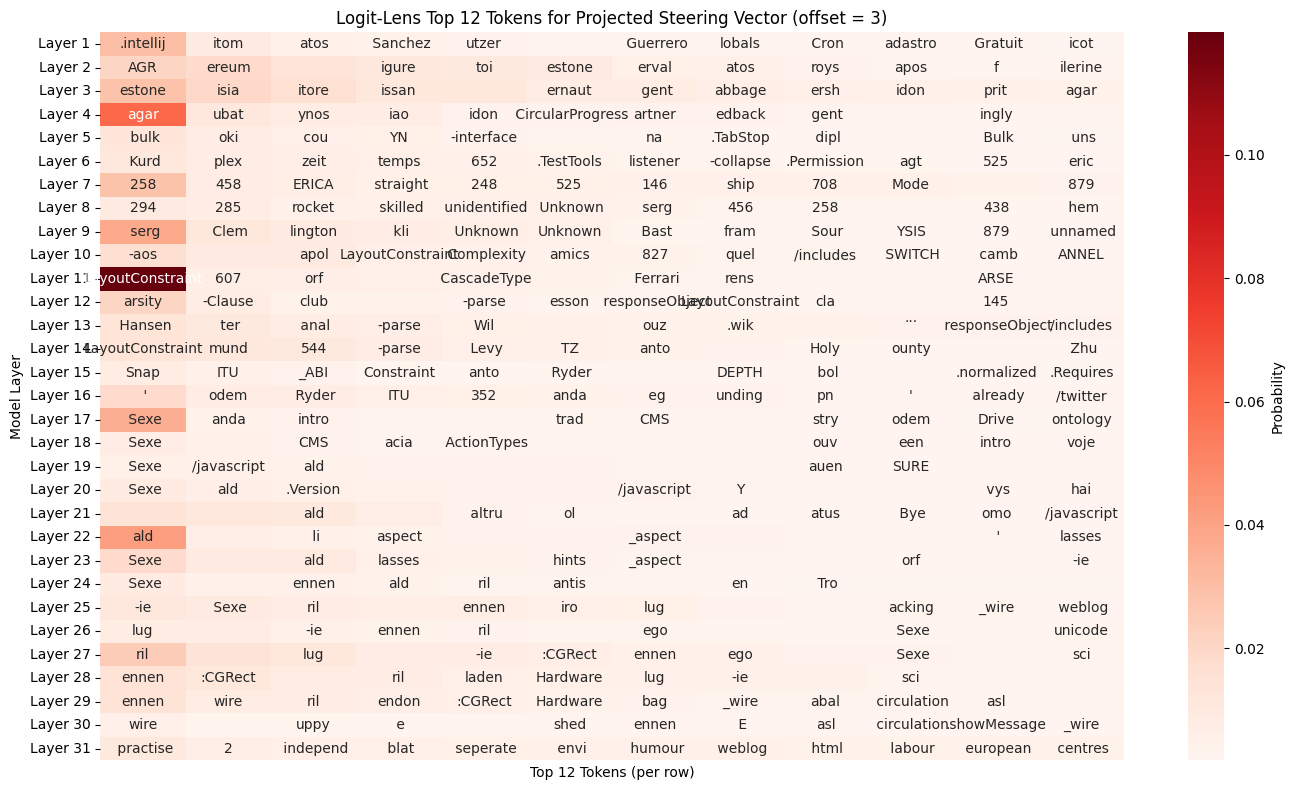

<ipython-input-39-0da94c21bf4d>:68: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


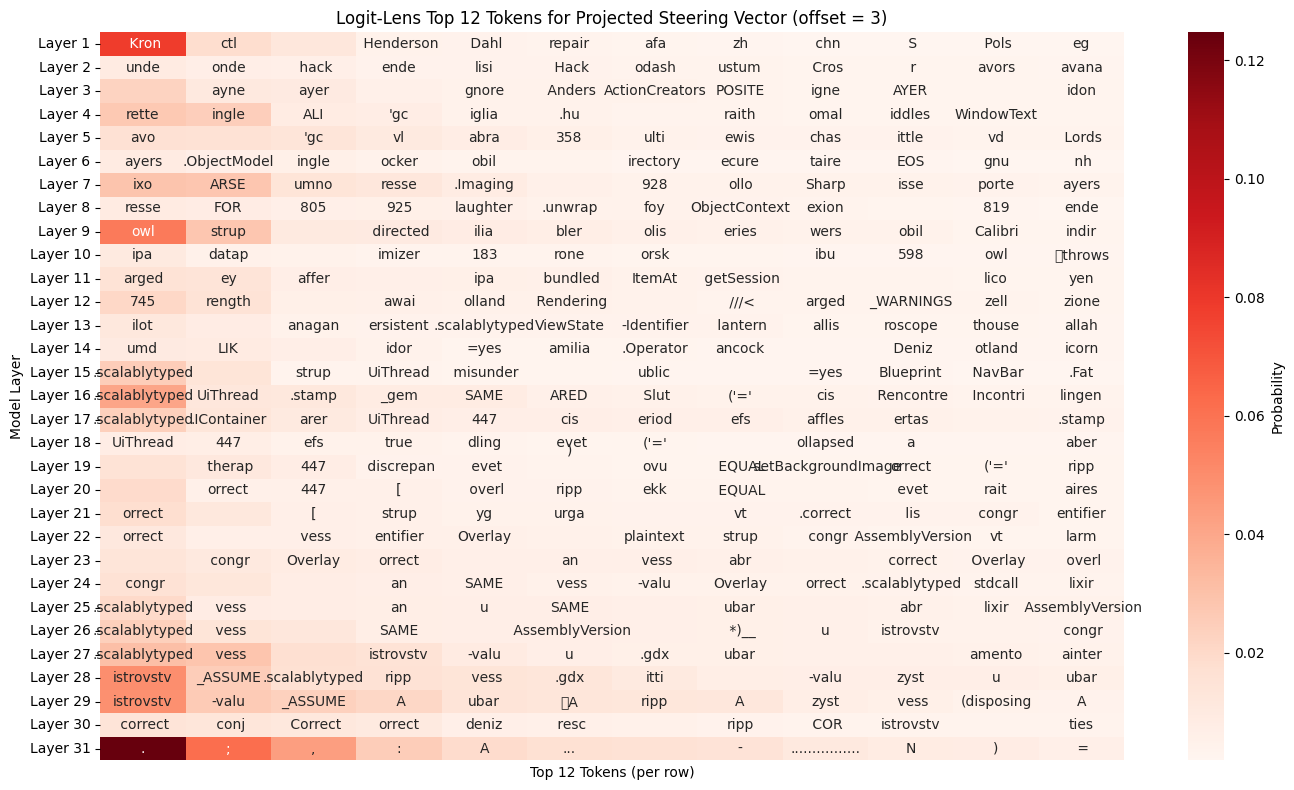

In [ ]:
chosen_offset = 3  # e.g. 4th‚Äêfrom‚Äêlast token
map_logit_lens_projected(
    layer_proj=projected_vectors_by_layer,
    model=model,
    tokenizer=tok,                   # pass your tokenizer here
    position=chosen_offset,
    top_k=12,
    suffix=f" (offset = {chosen_offset})"
)
map_logit_lens_projected(
    layer_proj=loaded_proj_with_nuissance,
    model=model,
    tokenizer=tok,                   # pass your tokenizer here
    position=chosen_offset,
    top_k=12,
    suffix=f" (offset = {chosen_offset})"
)



Keys (layers) in projected_vectors_by_layer: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Number of offsets in layer 1: 10
Loaded-offsets-with-nuisance layers (0-based): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Offsets per layer example (layer 0): 10
Loaded-proj-offsets layers (0-based): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
Offsets per layer example (layer 0): 10
Layers for average nuisance: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


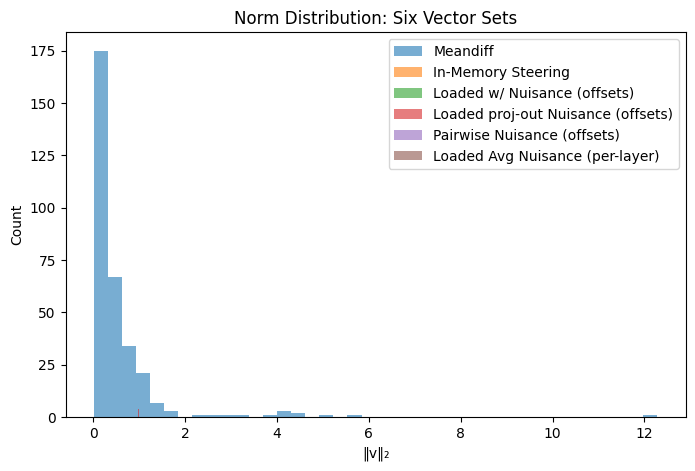

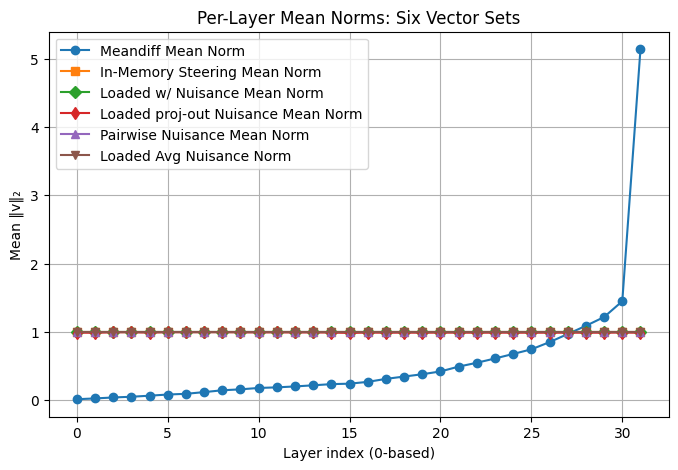

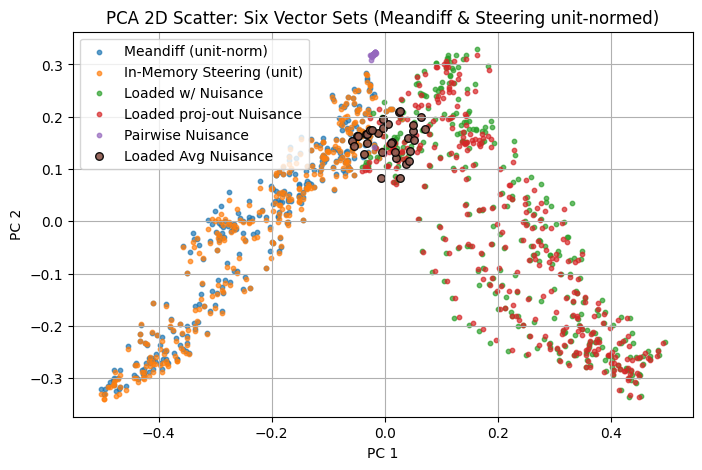

Average within-group cosines:
  Meandiff:                        0.095
  In-Memory Steering:              0.095
  Loaded w/ Nuisance (offsets):    0.115
  Loaded proj-out Nuisance:        0.113
  Pairwise Nuisance (per-layer):   0.862
  Loaded Avg Nuisance (per-layer): 0.188

Average cross-group cosines:
  Meandiff vs In-Memory Steering: 0.098
  Meandiff vs Loaded w/ Nuisance: 0.003
  Meandiff vs Loaded proj-out Nuisance: 0.003
  Meandiff vs Pairwise Nuisance: 0.012
  Meandiff vs Loaded Avg Nuisance: 0.005
  In-Memory Steering vs Loaded w/ Nuisance: 0.003
  In-Memory Steering vs Loaded proj-out Nuisance: 0.002
  In-Memory Steering vs Pairwise Nuisance: -0.000
  In-Memory Steering vs Loaded Avg Nuisance: 0.005
  Loaded w/ Nuisance vs Loaded proj-out Nuisance: 0.116
  Loaded w/ Nuisance vs Pairwise Nuisance: 0.010
  Loaded w/ Nuisance vs Loaded Avg Nuisance: 0.027
  Loaded proj-out Nuisance vs Pairwise Nuisance: 0.008
  Loaded proj-out Nuisance vs Loaded Avg Nuisance: 0.008
  Pairwise Nu

In [ ]:
'''
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# ‚îÄ‚îÄ‚îÄ 0. LOAD ALL STEERING-VECTOR SETS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# (A) In-memory steering vectors (already computed elsewhere in your script)
#     We assume `projected_vectors_by_layer` is defined before this block.
print(f"Keys (layers) in projected_vectors_by_layer: {sorted(projected_vectors_by_layer.keys())}")
print(f"Number of offsets in layer 1: {len(projected_vectors_by_layer[1])}")

# (B) Loaded steering vectors ‚Äúwith nuisance‚Äù (original pickle: per-offset)
with open('steering_vectors_newbalancedtask3_meandiff.pkl', 'rb') as f:
    loaded_offsets_with_nuisance = pickle.load(f)
print("Loaded-offsets-with-nuisance layers (0-based):", sorted(loaded_offsets_with_nuisance.keys()))
print("Offsets per layer example (layer 0):", len(loaded_offsets_with_nuisance[0]))

# (C) Loaded steering vectors ‚Äúprojected-out nuisance‚Äù (new pickle: per-offset)
with open('steering_vectors_newbalancedtask3_meandiff_projectoutnuisance.pkl', 'rb') as f:
    loaded_proj = pickle.load(f)
print("Loaded-proj-offsets layers (0-based):", sorted(loaded_proj.keys()))
print("Offsets per layer example (layer 0):", len(loaded_proj[0]))


# ‚îÄ‚îÄ‚îÄ 0.5 COMPUTE AVERAGE NUISANCE VECTOR PER LAYER (from loaded offsets) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

loaded_avg_nuisance = {}
for layer in sorted(loaded_offsets_with_nuisance.keys()):
    diffs = []
    for i in range(len(loaded_offsets_with_nuisance[layer])):
        w = loaded_offsets_with_nuisance[layer][i].numpy()
        p = loaded_proj[layer][i].numpy()
        diffs.append(w - p)               # this is the nuisance component for offset i

    diffs = np.vstack(diffs)             # shape (K, hidden)
    avg_nuis = diffs.mean(axis=0)        # average difference across offsets
    avg_nuis = avg_nuis / np.linalg.norm(avg_nuis)
    loaded_avg_nuisance[layer] = avg_nuis  # unit‚Äênorm nuisance for this layer

print("Layers for average nuisance:", sorted(loaded_avg_nuisance.keys()))


# ‚îÄ‚îÄ‚îÄ 1. CONVERT ALL VECTORS TO NUMPY ARRAYS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# 1A. Mean-diff: layer_diffs[‚Ñì] ‚Üí list of length K Tensors
meandiff_np_list = [v.numpy() for vs in layer_diffs.values() for v in vs]        # 320 √ó hidden

# 1B. In-memory steering (residual) from projected_vectors_by_layer
steering_np_list = [v.numpy() for vs in projected_vectors_by_layer.values() for v in vs]  # 320 √ó hidden

# 1C. Loaded-with-nuisance offsets (original pickle)
loaded_wn_np_list = [v.numpy() for vs in loaded_offsets_with_nuisance.values() for v in vs]  # 320 √ó hidden

# 1D. Loaded-proj offsets (project-out-nuisance pickle)
loaded_proj_np_list = [v.numpy() for vs in loaded_proj.values() for v in vs]                # 320 √ó hidden

# 1E. Pairwise nuisance offsets: pairwise_nuisance[‚Ñì] may have M vectors per layer
nuisance_np_list = [v.numpy() for vs in pairwise_nuisance.values() for v in vs]             # (~480) √ó hidden

# 1F. Loaded-average-nuisance: one vector per layer
loaded_avg_nuis_np_list = [vec for layer, vec in sorted(loaded_avg_nuisance.items())]       # 32 √ó hidden

# Stack into matrices
meandiff_mat         = np.vstack(meandiff_np_list)       # (320, hidden)
steering_mat         = np.vstack(steering_np_list)       # (320, hidden)
loaded_wn_mat        = np.vstack(loaded_wn_np_list)      # (320, hidden)
loaded_proj_mat      = np.vstack(loaded_proj_np_list)    # (320, hidden)
pairwise_nuis_mat    = np.vstack(nuisance_np_list)       # (~480, hidden)
loaded_avg_nuis_mat  = np.vstack(loaded_avg_nuis_np_list)  # (32, hidden)


# ‚îÄ‚îÄ‚îÄ 2. NORM HISTOGRAMS FOR EACH SET ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

meandiff_norms     = np.linalg.norm(meandiff_mat, axis=1)
steering_norms     = np.linalg.norm(steering_mat, axis=1)
loaded_wn_norms    = np.linalg.norm(loaded_wn_mat, axis=1)
loaded_proj_norms  = np.linalg.norm(loaded_proj_mat, axis=1)
pairwise_nu_norms  = np.linalg.norm(pairwise_nuis_mat, axis=1)
loaded_avg_nu_norms = np.linalg.norm(loaded_avg_nuis_mat, axis=1)

plt.figure(figsize=(8, 5))
plt.hist(meandiff_norms,      bins=40, alpha=0.6, label="Meandiff")
plt.hist(steering_norms,      bins=40, alpha=0.6, label="In-Memory Steering")
plt.hist(loaded_wn_norms,     bins=40, alpha=0.6, label="Loaded w/ Nuisance (offsets)")
plt.hist(loaded_proj_norms,   bins=40, alpha=0.6, label="Loaded proj-out Nuisance (offsets)")
plt.hist(pairwise_nu_norms,   bins=40, alpha=0.6, label="Pairwise Nuisance (offsets)")
plt.hist(loaded_avg_nu_norms, bins=40, alpha=0.6, label="Loaded Avg Nuisance (per-layer)")
plt.title("Norm Distribution: Six Vector Sets")
plt.xlabel("‚Äñv‚Äñ‚ÇÇ")
plt.ylabel("Count")
plt.legend()
plt.show()


# ‚îÄ‚îÄ‚îÄ 3. PER-LAYER MEAN NORMS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

num_layers = len(layer_diffs)      # should be 32
K = len(next(iter(layer_diffs.values())))  # should be 10

# 3A. Meandiff norms per layer √ó offset
meandiff_norms_per_layer = np.zeros((num_layers, K))
for i, ‚Ñì in enumerate(sorted(layer_diffs.keys())):
    for j, v in enumerate(layer_diffs[‚Ñì]):
        meandiff_norms_per_layer[i, j] = np.linalg.norm(v.numpy())

# 3B. In-memory steering norms per layer √ó offset
steering_norms_per_layer = np.zeros((num_layers, K))
for i, ‚Ñì in enumerate(sorted(projected_vectors_by_layer.keys())):
    for j, v in enumerate(projected_vectors_by_layer[‚Ñì]):
        steering_norms_per_layer[i, j] = np.linalg.norm(v.numpy())

# 3C. Loaded-with-nuisance norms per layer √ó offset
loaded_wn_norms_per_layer = np.zeros((num_layers, K))
for i, ‚Ñì in enumerate(sorted(loaded_offsets_with_nuisance.keys())):
    for j, v in enumerate(loaded_offsets_with_nuisance[‚Ñì]):
        loaded_wn_norms_per_layer[i, j] = np.linalg.norm(v.numpy())

# 3D. Loaded-proj (project-out-nuisance) norms per layer √ó offset
loaded_proj_norms_per_layer = np.zeros((num_layers, K))
for i, ‚Ñì in enumerate(sorted(loaded_proj.keys())):
    for j, v in enumerate(loaded_proj[‚Ñì]):
        loaded_proj_norms_per_layer[i, j] = np.linalg.norm(v.numpy())

# 3E. Pairwise nuisance mean norm per layer (variable # per layer)
pairwise_nu_norms_per_layer = np.zeros(num_layers)
for i, ‚Ñì in enumerate(sorted(pairwise_nuisance.keys())):
    nu_norms = [np.linalg.norm(v.numpy()) for v in pairwise_nuisance[‚Ñì]]
    pairwise_nu_norms_per_layer[i] = np.mean(nu_norms)

# 3F. Loaded-average-nuisance norm per layer (single value per layer)
loaded_avg_nu_norms_per_layer = np.zeros(num_layers)
for i, ‚Ñì in enumerate(sorted(loaded_avg_nuisance.keys())):
    loaded_avg_nu_norms_per_layer[i] = np.linalg.norm(loaded_avg_nuisance[‚Ñì])

# Plot per-layer mean norms
layers = np.arange(num_layers)
plt.figure(figsize=(8, 5))
plt.plot(layers, meandiff_norms_per_layer.mean(axis=1),    marker='o', label='Meandiff Mean Norm')
plt.plot(layers, steering_norms_per_layer.mean(axis=1),    marker='s', label='In-Memory Steering Mean Norm')
plt.plot(layers, loaded_wn_norms_per_layer.mean(axis=1),   marker='D', label='Loaded w/ Nuisance Mean Norm')
plt.plot(layers, loaded_proj_norms_per_layer.mean(axis=1), marker='d', label='Loaded proj-out Nuisance Mean Norm')
plt.plot(layers, pairwise_nu_norms_per_layer,               marker='^', label='Pairwise Nuisance Mean Norm')
plt.plot(layers, loaded_avg_nu_norms_per_layer,             marker='v', label='Loaded Avg Nuisance Norm')
plt.title("Per-Layer Mean Norms: Six Vector Sets")
plt.xlabel("Layer index (0-based)")
plt.ylabel("Mean ‚Äñv‚Äñ‚ÇÇ")
plt.legend()
plt.grid(True)
plt.show()


# ‚îÄ‚îÄ‚îÄ 4. PCA 2D SCATTER FOR ALL VECTORS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

all_mat = np.vstack([
    meandiff_mat,
    steering_mat,
    loaded_wn_mat,
    loaded_proj_mat,
    pairwise_nuis_mat,
    loaded_avg_nuis_mat
])
pca = PCA(n_components=2)
coords = pca.fit_transform(all_mat)  # shape (N_total, 2)

# Split back into groups
n1 = meandiff_mat.shape[0]
n2 = steering_mat.shape[0]
n3 = loaded_wn_mat.shape[0]
n4 = loaded_proj_mat.shape[0]
n5 = pairwise_nuis_mat.shape[0]
n6 = loaded_avg_nuis_mat.shape[0]

coords_meandiff      = coords[:n1]
coords_steering      = coords[n1:n1+n2]
coords_loaded_wn     = coords[n1+n2:n1+n2+n3]
coords_loaded_pr     = coords[n1+n2+n3:n1+n2+n3+n4]
coords_pairwise_nu   = coords[n1+n2+n3+n4:n1+n2+n3+n4+n5]
coords_loaded_avg_nu = coords[-n6:]

plt.figure(figsize=(8, 5))
plt.scatter(coords_meandiff[:, 0],      coords_meandiff[:, 1],      s=10, label='Meandiff', alpha=0.7)
plt.scatter(coords_steering[:, 0],      coords_steering[:, 1],      s=10, label='In-Memory Steering', alpha=0.7)
plt.scatter(coords_loaded_wn[:, 0],     coords_loaded_wn[:, 1],     s=10, label='Loaded w/ Nuisance', alpha=0.7)
plt.scatter(coords_loaded_pr[:, 0],     coords_loaded_pr[:, 1],     s=10, label='Loaded proj-out Nuisance', alpha=0.7)
plt.scatter(coords_pairwise_nu[:, 0],   coords_pairwise_nu[:, 1],   s=10, label='Pairwise Nuisance', alpha=0.7)
plt.scatter(coords_loaded_avg_nu[:, 0], coords_loaded_avg_nu[:, 1], s=30, label='Loaded Avg Nuisance', alpha=0.9, edgecolors='k')
plt.title("PCA 2D Scatter: Six Vector Sets")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.grid(True)
plt.show()


# ‚îÄ‚îÄ‚îÄ 5. COSINE SIMILARITY ANALYSIS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# 5A. Within-group average cosine for each of the six sets
cos_md    = cosine_similarity(meandiff_mat)
avg_cos_md = np.mean(cos_md[np.triu_indices_from(cos_md, k=1)])

cos_st    = cosine_similarity(steering_mat)
avg_cos_st = np.mean(cos_st[np.triu_indices_from(cos_st, k=1)])

cos_wn    = cosine_similarity(loaded_wn_mat)
avg_cos_wn = np.mean(cos_wn[np.triu_indices_from(cos_wn, k=1)])

cos_pr    = cosine_similarity(loaded_proj_mat)
avg_cos_pr = np.mean(cos_pr[np.triu_indices_from(cos_pr, k=1)])

cos_pn    = cosine_similarity(pairwise_nuis_mat)
avg_cos_pn = np.mean(cos_pn[np.triu_indices_from(cos_pn, k=1)])

cos_an    = cosine_similarity(loaded_avg_nuis_mat)
avg_cos_an = np.mean(cos_an[np.triu_indices_from(cos_an, k=1)])

print("Average within-group cosines:")
print(f"  Meandiff:                      {avg_cos_md:.3f}")
print(f"  In-Memory Steering:            {avg_cos_st:.3f}")
print(f"  Loaded w/ Nuisance (offsets):  {avg_cos_wn:.3f}")
print(f"  Loaded proj-out Nuisance:      {avg_cos_pr:.3f}")
print(f"  Pairwise Nuisance (offsets):   {avg_cos_pn:.3f}")
print(f"  Loaded Avg Nuisance (per-layer): {avg_cos_an:.3f}\n")

# 5B. Between-group average cosines
def avg_cross_cos(matA, matB):
    return float(np.mean(cosine_similarity(matA, matB)))

pairs = [
    ("Meandiff", meandiff_mat, "In-Memory Steering", steering_mat),
    ("Meandiff", meandiff_mat, "Loaded w/ Nuisance", loaded_wn_mat),
    ("Meandiff", meandiff_mat, "Loaded proj-out Nuisance", loaded_proj_mat),
    ("Meandiff", meandiff_mat, "Pairwise Nuisance", pairwise_nuis_mat),
    ("Meandiff", meandiff_mat, "Loaded Avg Nuisance", loaded_avg_nuis_mat),
    ("In-Memory Steering", steering_mat, "Loaded w/ Nuisance", loaded_wn_mat),
    ("In-Memory Steering", steering_mat, "Loaded proj-out Nuisance", loaded_proj_mat),
    ("In-Memory Steering", steering_mat, "Pairwise Nuisance", pairwise_nuis_mat),
    ("In-Memory Steering", steering_mat, "Loaded Avg Nuisance", loaded_avg_nuis_mat),
    ("Loaded w/ Nuisance", loaded_wn_mat, "Loaded proj-out Nuisance", loaded_proj_mat),
    ("Loaded w/ Nuisance", loaded_wn_mat, "Pairwise Nuisance", pairwise_nuis_mat),
    ("Loaded w/ Nuisance", loaded_wn_mat, "Loaded Avg Nuisance", loaded_avg_nuis_mat),
    ("Loaded proj-out Nuisance", loaded_proj_mat, "Pairwise Nuisance", pairwise_nuis_mat),
    ("Loaded proj-out Nuisance", loaded_proj_mat, "Loaded Avg Nuisance", loaded_avg_nuis_mat),
    ("Pairwise Nuisance", pairwise_nuis_mat, "Loaded Avg Nuisance", loaded_avg_nuis_mat),
]

print("Average cross-group cosines:")
for nameA, matA, nameB, matB in pairs:
    print(f"  {nameA} vs {nameB}: {avg_cross_cos(matA, matB):.3f}")
'''
'''
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# ‚îÄ‚îÄ‚îÄ 0. LOAD ALL STEERING-VECTOR SETS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# (A) In-memory steering vectors (already computed elsewhere in your script)
#     We assume `projected_vectors_by_layer` is defined before this block.
print(f"Keys (layers) in projected_vectors_by_layer: {sorted(projected_vectors_by_layer.keys())}")
print(f"Number of offsets in layer 1: {len(projected_vectors_by_layer[1])}")

# (B) Loaded steering vectors ‚Äúwith nuisance‚Äù (original pickle: per-offset)
with open('steering_vectors_newbalancedtask3_meandiff.pkl', 'rb') as f:
    loaded_offsets_with_nuisance = pickle.load(f)
print("Loaded-offsets-with-nuisance layers (0-based):", sorted(loaded_offsets_with_nuisance.keys()))
print("Offsets per layer example (layer 0):", len(loaded_offsets_with_nuisance[0]))

# (C) Loaded steering vectors ‚Äúprojected-out nuisance‚Äù (new pickle: per-offset)
with open('steering_vectors_newbalancedtask3_meandiff_projectoutnuisance.pkl', 'rb') as f:
    loaded_proj = pickle.load(f)
print("Loaded-proj-offsets layers (0-based):", sorted(loaded_proj.keys()))
print("Offsets per layer example (layer 0):", len(loaded_proj[0]))


# ‚îÄ‚îÄ‚îÄ 0.5 COMPUTE AVERAGE NUISANCE VECTOR PER LAYER (from loaded offsets) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

loaded_avg_nuisance = {}
for layer in sorted(loaded_offsets_with_nuisance.keys()):
    diffs = []
    for i in range(len(loaded_offsets_with_nuisance[layer])):
        w = loaded_offsets_with_nuisance[layer][i].numpy()
        p = loaded_proj[layer][i].numpy()
        diffs.append(w - p)               # this is the nuisance component for offset i

    diffs = np.vstack(diffs)             # shape (K, hidden)
    avg_nuis = diffs.mean(axis=0)        # average difference across offsets
    avg_nuis = avg_nuis / np.linalg.norm(avg_nuis)
    loaded_avg_nuisance[layer] = avg_nuis  # unit‚Äênorm nuisance for this layer

print("Layers for average nuisance:", sorted(loaded_avg_nuisance.keys()))


# ‚îÄ‚îÄ‚îÄ 1. CONVERT ALL VECTORS TO NUMPY ARRAYS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# 1A. Mean-diff: layer_diffs[‚Ñì] ‚Üí list of length K Tensors
meandiff_np_list = [v.numpy() for vs in layer_diffs.values() for v in vs]        # 320 √ó hidden

# 1B. In-memory steering (residual) from projected_vectors_by_layer
steering_np_list = [v.numpy() for vs in projected_vectors_by_layer.values() for v in vs]  # 320 √ó hidden

# 1C. Loaded-with-nuisance offsets (original pickle)
loaded_wn_np_list = [v.numpy() for vs in loaded_offsets_with_nuisance.values() for v in vs]  # 320 √ó hidden

# 1D. Loaded-proj offsets (project-out-nuisance pickle)
loaded_proj_np_list = [v.numpy() for vs in loaded_proj.values() for v in vs]                # 320 √ó hidden

# 1E. Pairwise nuisance (one vector per layer)
nuisance_np_list = [v.numpy() for v in pairwise_nuisance.values()]            # 32 √ó hidden

# 1F. Loaded-average-nuisance: one vector per layer
loaded_avg_nuis_np_list = [vec for layer, vec in sorted(loaded_avg_nuisance.items())]       # 32 √ó hidden

# Stack into matrices
meandiff_mat         = np.vstack(meandiff_np_list)       # (320, hidden)
steering_mat         = np.vstack(steering_np_list)       # (320, hidden)
loaded_wn_mat        = np.vstack(loaded_wn_np_list)      # (320, hidden)
loaded_proj_mat      = np.vstack(loaded_proj_np_list)    # (320, hidden)
pairwise_nuis_mat    = np.vstack(nuisance_np_list)       # (32, hidden)
loaded_avg_nuis_mat  = np.vstack(loaded_avg_nuis_np_list)  # (32, hidden)


# ‚îÄ‚îÄ‚îÄ 2. NORM HISTOGRAMS FOR EACH SET ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

meandiff_norms      = np.linalg.norm(meandiff_mat, axis=1)
steering_norms      = np.linalg.norm(steering_mat, axis=1)
loaded_wn_norms     = np.linalg.norm(loaded_wn_mat, axis=1)
loaded_proj_norms   = np.linalg.norm(loaded_proj_mat, axis=1)
pairwise_nu_norms   = np.linalg.norm(pairwise_nuis_mat, axis=1)
loaded_avg_nu_norms = np.linalg.norm(loaded_avg_nuis_mat, axis=1)

plt.figure(figsize=(8, 5))
plt.hist(meandiff_norms,      bins=40, alpha=0.6, label="Meandiff")
plt.hist(steering_norms,      bins=40, alpha=0.6, label="In-Memory Steering")
plt.hist(loaded_wn_norms,     bins=40, alpha=0.6, label="Loaded w/ Nuisance (offsets)")
plt.hist(loaded_proj_norms,   bins=40, alpha=0.6, label="Loaded proj-out Nuisance (offsets)")
plt.hist(pairwise_nu_norms,   bins=40, alpha=0.6, label="Pairwise Nuisance (per-layer)")
plt.hist(loaded_avg_nu_norms, bins=40, alpha=0.6, label="Loaded Avg Nuisance (per-layer)")
plt.title("Norm Distribution: Six Vector Sets")
plt.xlabel("‚Äñv‚Äñ‚ÇÇ")
plt.ylabel("Count")
plt.legend()
plt.show()


# ‚îÄ‚îÄ‚îÄ 3. PER-LAYER MEAN NORMS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

num_layers = len(layer_diffs)      # should be 32
K = len(next(iter(layer_diffs.values())))  # should be 10

# 3A. Meandiff norms per layer √ó offset
meandiff_norms_per_layer = np.zeros((num_layers, K))
for i, ‚Ñì in enumerate(sorted(layer_diffs.keys())):
    for j, v in enumerate(layer_diffs[‚Ñì]):
        meandiff_norms_per_layer[i, j] = np.linalg.norm(v.numpy())

# 3B. In-memory steering norms per layer √ó offset
steering_norms_per_layer = np.zeros((num_layers, K))
for i, ‚Ñì in enumerate(sorted(projected_vectors_by_layer.keys())):
    for j, v in enumerate(projected_vectors_by_layer[‚Ñì]):
        steering_norms_per_layer[i, j] = np.linalg.norm(v.numpy())

# 3C. Loaded-with-nuisance norms per layer √ó offset
loaded_wn_norms_per_layer = np.zeros((num_layers, K))
for i, ‚Ñì in enumerate(sorted(loaded_offsets_with_nuisance.keys())):
    for j, v in enumerate(loaded_offsets_with_nuisance[‚Ñì]):
        loaded_wn_norms_per_layer[i, j] = np.linalg.norm(v.numpy())

# 3D. Loaded-proj (project-out-nuisance) norms per layer √ó offset
loaded_proj_norms_per_layer = np.zeros((num_layers, K))
for i, ‚Ñì in enumerate(sorted(loaded_proj.keys())):
    for j, v in enumerate(loaded_proj[‚Ñì]):
        loaded_proj_norms_per_layer[i, j] = np.linalg.norm(v.numpy())

# 3E. Pairwise nuisance norm per layer (single vector per layer)
pairwise_nu_norms_per_layer = np.zeros(num_layers)
for i, (‚Ñì, vec) in enumerate(sorted(pairwise_nuisance.items())):
    pairwise_nu_norms_per_layer[i] = np.linalg.norm(vec.numpy())

# 3F. Loaded-average-nuisance norm per layer (single value per layer)
loaded_avg_nu_norms_per_layer = np.zeros(num_layers)
for i, ‚Ñì in enumerate(sorted(loaded_avg_nuisance.keys())):
    loaded_avg_nu_norms_per_layer[i] = np.linalg.norm(loaded_avg_nuisance[‚Ñì])

# Plot per-layer mean norms
layers = np.arange(num_layers)
plt.figure(figsize=(8, 5))
plt.plot(layers, meandiff_norms_per_layer.mean(axis=1),    marker='o', label='Meandiff Mean Norm')
plt.plot(layers, steering_norms_per_layer.mean(axis=1),    marker='s', label='In-Memory Steering Mean Norm')
plt.plot(layers, loaded_wn_norms_per_layer.mean(axis=1),   marker='D', label='Loaded w/ Nuisance Mean Norm')
plt.plot(layers, loaded_proj_norms_per_layer.mean(axis=1), marker='d', label='Loaded proj-out Nuisance Mean Norm')
plt.plot(layers, pairwise_nu_norms_per_layer,               marker='^', label='Pairwise Nuisance Norm (per-layer)')
plt.plot(layers, loaded_avg_nu_norms_per_layer,             marker='v', label='Loaded Avg Nuisance Norm')
plt.title("Per-Layer Mean Norms: Six Vector Sets")
plt.xlabel("Layer index (0-based)")
plt.ylabel("Mean ‚Äñv‚Äñ‚ÇÇ")
plt.legend()
plt.grid(True)
plt.show()


# ‚îÄ‚îÄ‚îÄ 4. PCA 2D SCATTER FOR ALL VECTORS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

all_mat = np.vstack([
    meandiff_mat,
    steering_mat,
    loaded_wn_mat,
    loaded_proj_mat,
    pairwise_nuis_mat,
    loaded_avg_nuis_mat
])
pca = PCA(n_components=2)
coords = pca.fit_transform(all_mat)  # shape (N_total, 2)

# Split back into groups
n1 = meandiff_mat.shape[0]
n2 = steering_mat.shape[0]
n3 = loaded_wn_mat.shape[0]
n4 = loaded_proj_mat.shape[0]
n5 = pairwise_nuis_mat.shape[0]
n6 = loaded_avg_nuis_mat.shape[0]

coords_meandiff      = coords[:n1]
coords_steering      = coords[n1:n1+n2]
coords_loaded_wn     = coords[n1+n2:n1+n2+n3]
coords_loaded_pr     = coords[n1+n2+n3:n1+n2+n3+n4]
coords_pairwise_nu   = coords[n1+n2+n3+n4:n1+n2+n3+n4+n5]
coords_loaded_avg_nu = coords[-n6:]

plt.figure(figsize=(8, 5))
plt.scatter(coords_meandiff[:, 0],      coords_meandiff[:, 1],      s=10, label='Meandiff', alpha=0.7)
plt.scatter(coords_steering[:, 0],      coords_steering[:, 1],      s=10, label='In-Memory Steering', alpha=0.7)
plt.scatter(coords_loaded_wn[:, 0],     coords_loaded_wn[:, 1],     s=10, label='Loaded w/ Nuisance', alpha=0.7)
plt.scatter(coords_loaded_pr[:, 0],     coords_loaded_pr[:, 1],     s=10, label='Loaded proj-out Nuisance', alpha=0.7)
plt.scatter(coords_pairwise_nu[:, 0],   coords_pairwise_nu[:, 1],   s=10, label='Pairwise Nuisance', alpha=0.7)
plt.scatter(coords_loaded_avg_nu[:, 0], coords_loaded_avg_nu[:, 1], s=30, label='Loaded Avg Nuisance', alpha=0.9, edgecolors='k')
plt.title("PCA 2D Scatter: Six Vector Sets")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.grid(True)
plt.show()


# ‚îÄ‚îÄ‚îÄ 5. COSINE SIMILARITY ANALYSIS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# 5A. Within-group average cosine for each of the six sets
cos_md    = cosine_similarity(meandiff_mat)
avg_cos_md = np.mean(cos_md[np.triu_indices_from(cos_md, k=1)])

cos_st    = cosine_similarity(steering_mat)
avg_cos_st = np.mean(cos_st[np.triu_indices_from(cos_st, k=1)])

cos_wn    = cosine_similarity(loaded_wn_mat)
avg_cos_wn = np.mean(cos_wn[np.triu_indices_from(cos_wn, k=1)])

cos_pr    = cosine_similarity(loaded_proj_mat)
avg_cos_pr = np.mean(cos_pr[np.triu_indices_from(cos_pr, k=1)])

cos_pn    = cosine_similarity(pairwise_nuis_mat)
avg_cos_pn = np.mean(cos_pn[np.triu_indices_from(cos_pn, k=1)])

cos_an    = cosine_similarity(loaded_avg_nuis_mat)
avg_cos_an = np.mean(cos_an[np.triu_indices_from(cos_an, k=1)])

print("Average within-group cosines:")
print(f"  Meandiff:                        {avg_cos_md:.3f}")
print(f"  In-Memory Steering:              {avg_cos_st:.3f}")
print(f"  Loaded w/ Nuisance (offsets):    {avg_cos_wn:.3f}")
print(f"  Loaded proj-out Nuisance:        {avg_cos_pr:.3f}")
print(f"  Pairwise Nuisance (per-layer):   {avg_cos_pn:.3f}")
print(f"  Loaded Avg Nuisance (per-layer): {avg_cos_an:.3f}\n")

# 5B. Between-group average cosines
def avg_cross_cos(matA, matB):
    return float(np.mean(cosine_similarity(matA, matB)))

pairs = [
    ("Meandiff", meandiff_mat, "In-Memory Steering", steering_mat),
    ("Meandiff", meandiff_mat, "Loaded w/ Nuisance", loaded_wn_mat),
    ("Meandiff", meandiff_mat, "Loaded proj-out Nuisance", loaded_proj_mat),
    ("Meandiff", meandiff_mat, "Pairwise Nuisance", pairwise_nuis_mat),
    ("Meandiff", meandiff_mat, "Loaded Avg Nuisance", loaded_avg_nuis_mat),
    ("In-Memory Steering", steering_mat, "Loaded w/ Nuisance", loaded_wn_mat),
    ("In-Memory Steering", steering_mat, "Loaded proj-out Nuisance", loaded_proj_mat),
    ("In-Memory Steering", steering_mat, "Pairwise Nuisance", pairwise_nuis_mat),
    ("In-Memory Steering", steering_mat, "Loaded Avg Nuisance", loaded_avg_nuis_mat),
    ("Loaded w/ Nuisance", loaded_wn_mat, "Loaded proj-out Nuisance", loaded_proj_mat),
    ("Loaded w/ Nuisance", loaded_wn_mat, "Pairwise Nuisance", pairwise_nuis_mat),
    ("Loaded w/ Nuisance", loaded_wn_mat, "Loaded Avg Nuisance", loaded_avg_nuis_mat),
    ("Loaded proj-out Nuisance", loaded_proj_mat, "Pairwise Nuisance", pairwise_nuis_mat),
    ("Loaded proj-out Nuisance", loaded_proj_mat, "Loaded Avg Nuisance", loaded_avg_nuis_mat),
    ("Pairwise Nuisance", pairwise_nuis_mat, "Loaded Avg Nuisance", loaded_avg_nuis_mat),
]

print("Average cross-group cosines:")
for nameA, matA, nameB, matB in pairs:
    print(f"  {nameA} vs {nameB}: {avg_cross_cos(matA, matB):.3f}")
'''
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

# ‚îÄ‚îÄ‚îÄ 0. LOAD ALL STEERING-VECTOR SETS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# (A) In-memory steering vectors (already computed elsewhere in your script)
#     We assume `projected_vectors_by_layer` is defined before this block.
print(f"Keys (layers) in projected_vectors_by_layer: {sorted(projected_vectors_by_layer.keys())}")
print(f"Number of offsets in layer 1: {len(projected_vectors_by_layer[1])}")

# (B) Loaded steering vectors ‚Äúwith nuisance‚Äù (original pickle: per-offset)
with open('steering_vectors_newbalancedtask3_meandiff.pkl', 'rb') as f:
    loaded_offsets_with_nuisance = pickle.load(f)
print("Loaded-offsets-with-nuisance layers (0-based):", sorted(loaded_offsets_with_nuisance.keys()))
print("Offsets per layer example (layer 0):", len(loaded_offsets_with_nuisance[0]))

# (C) Loaded steering vectors ‚Äúprojected-out nuisance‚Äù (new pickle: per-offset)
with open('steering_vectors_newbalancedtask3_meandiff_projectoutnuisance.pkl', 'rb') as f:
    loaded_proj = pickle.load(f)
print("Loaded-proj-offsets layers (0-based):", sorted(loaded_proj.keys()))
print("Offsets per layer example (layer 0):", len(loaded_proj[0]))


# ‚îÄ‚îÄ‚îÄ 0.5 COMPUTE AVERAGE NUISANCE VECTOR PER LAYER (from loaded offsets) ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

loaded_avg_nuisance = {}
for layer in sorted(loaded_offsets_with_nuisance.keys()):
    diffs = []
    for i in range(len(loaded_offsets_with_nuisance[layer])):
        w = loaded_offsets_with_nuisance[layer][i].numpy()
        p = loaded_proj[layer][i].numpy()
        diffs.append(w - p)               # this is the nuisance component for offset i

    diffs = np.vstack(diffs)             # shape (K, hidden)
    avg_nuis = diffs.mean(axis=0)        # average difference across offsets
    avg_nuis = avg_nuis / np.linalg.norm(avg_nuis)
    loaded_avg_nuisance[layer] = avg_nuis  # unit‚Äênorm nuisance for this layer

print("Layers for average nuisance:", sorted(loaded_avg_nuisance.keys()))


# ‚îÄ‚îÄ‚îÄ 1. CONVERT ALL VECTORS TO NUMPY ARRAYS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# 1A. Mean-diff: layer_diffs[‚Ñì] ‚Üí list of length K Tensors
meandiff_np_list = [v.numpy() for vs in layer_diffs.values() for v in vs]        # 320 √ó hidden

# 1B. In-memory steering (residual) from projected_vectors_by_layer
steering_np_list = [v.numpy() for vs in projected_vectors_by_layer.values() for v in vs]  # 320 √ó hidden

# 1C. Loaded-with-nuisance offsets (original pickle)
loaded_wn_np_list = [v.numpy() for vs in loaded_offsets_with_nuisance.values() for v in vs]  # 320 √ó hidden

# 1D. Loaded-proj offsets (project-out-nuisance pickle)
loaded_proj_np_list = [v.numpy() for vs in loaded_proj.values() for v in vs]                # 320 √ó hidden

# 1E. Pairwise nuisance (one vector per layer)
nuisance_np_list = [v.numpy() for v in pairwise_nuisance.values()]            # 32 √ó hidden

# 1F. Loaded-average-nuisance: one vector per layer
loaded_avg_nuis_np_list = [vec for layer, vec in sorted(loaded_avg_nuisance.items())]       # 32 √ó hidden

# Stack into matrices (raw)
meandiff_mat         = np.vstack(meandiff_np_list)       # (320, hidden)
steering_mat         = np.vstack(steering_np_list)       # (320, hidden)
loaded_wn_mat        = np.vstack(loaded_wn_np_list)      # (320, hidden)
loaded_proj_mat      = np.vstack(loaded_proj_np_list)    # (320, hidden)
pairwise_nuis_mat    = np.vstack(nuisance_np_list)       # (32, hidden)
loaded_avg_nuis_mat  = np.vstack(loaded_avg_nuis_np_list)  # (32, hidden)


# ‚îÄ‚îÄ‚îÄ 2. NORM HISTOGRAMS FOR EACH SET ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

meandiff_norms      = np.linalg.norm(meandiff_mat, axis=1)
steering_norms      = np.linalg.norm(steering_mat, axis=1)
loaded_wn_norms     = np.linalg.norm(loaded_wn_mat, axis=1)
loaded_proj_norms   = np.linalg.norm(loaded_proj_mat, axis=1)
pairwise_nu_norms   = np.linalg.norm(pairwise_nuis_mat, axis=1)
loaded_avg_nu_norms = np.linalg.norm(loaded_avg_nuis_mat, axis=1)

plt.figure(figsize=(8, 5))
plt.hist(meandiff_norms,      bins=40, alpha=0.6, label="Meandiff")
plt.hist(steering_norms,      bins=40, alpha=0.6, label="In-Memory Steering")
plt.hist(loaded_wn_norms,     bins=40, alpha=0.6, label="Loaded w/ Nuisance (offsets)")
plt.hist(loaded_proj_norms,   bins=40, alpha=0.6, label="Loaded proj-out Nuisance (offsets)")
plt.hist(pairwise_nu_norms,   bins=40, alpha=0.6, label="Pairwise Nuisance (offsets)")
plt.hist(loaded_avg_nu_norms, bins=40, alpha=0.6, label="Loaded Avg Nuisance (per-layer)")
plt.title("Norm Distribution: Six Vector Sets")
plt.xlabel("‚Äñv‚Äñ‚ÇÇ")
plt.ylabel("Count")
plt.legend()
plt.show()


# ‚îÄ‚îÄ‚îÄ 3. PER-LAYER MEAN NORMS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

num_layers = len(layer_diffs)      # should be 32
K = len(next(iter(layer_diffs.values())))  # should be 10

# 3A. Meandiff norms per layer √ó offset (raw)
meandiff_norms_per_layer = np.zeros((num_layers, K))
for i, ‚Ñì in enumerate(sorted(layer_diffs.keys())):
    for j, v in enumerate(layer_diffs[‚Ñì]):
        meandiff_norms_per_layer[i, j] = np.linalg.norm(v.numpy())

# 3B. In-memory steering norms per layer √ó offset
steering_norms_per_layer = np.zeros((num_layers, K))
for i, ‚Ñì in enumerate(sorted(projected_vectors_by_layer.keys())):
    for j, v in enumerate(projected_vectors_by_layer[‚Ñì]):
        steering_norms_per_layer[i, j] = np.linalg.norm(v.numpy())

# 3C. Loaded-with-nuisance norms per layer √ó offset
loaded_wn_norms_per_layer = np.zeros((num_layers, K))
for i, ‚Ñì in enumerate(sorted(loaded_offsets_with_nuisance.keys())):
    for j, v in enumerate(loaded_offsets_with_nuisance[‚Ñì]):
        loaded_wn_norms_per_layer[i, j] = np.linalg.norm(v.numpy())

# 3D. Loaded-proj (project-out-nuisance) norms per layer √ó offset
loaded_proj_norms_per_layer = np.zeros((num_layers, K))
for i, ‚Ñì in enumerate(sorted(loaded_proj.keys())):
    for j, v in enumerate(loaded_proj[‚Ñì]):
        loaded_proj_norms_per_layer[i, j] = np.linalg.norm(v.numpy())

# 3E. Pairwise nuisance mean norm per layer (single vector per layer)
pairwise_nu_norms_per_layer = np.zeros(num_layers)
for i, ‚Ñì in enumerate(sorted(pairwise_nuisance.keys())):
    pairwise_nu_norms_per_layer[i] = np.linalg.norm(pairwise_nuisance[‚Ñì].numpy())

# 3F. Loaded-average-nuisance norm per layer (single vector per layer)
loaded_avg_nu_norms_per_layer = np.zeros(num_layers)
for i, ‚Ñì in enumerate(sorted(loaded_avg_nuisance.keys())):
    loaded_avg_nu_norms_per_layer[i] = np.linalg.norm(loaded_avg_nuisance[‚Ñì])

# Plot per-layer mean norms (raw values)
layers = np.arange(num_layers)
plt.figure(figsize=(8, 5))
plt.plot(layers, meandiff_norms_per_layer.mean(axis=1),    marker='o', label='Meandiff Mean Norm')
plt.plot(layers, steering_norms_per_layer.mean(axis=1),    marker='s', label='In-Memory Steering Mean Norm')
plt.plot(layers, loaded_wn_norms_per_layer.mean(axis=1),   marker='D', label='Loaded w/ Nuisance Mean Norm')
plt.plot(layers, loaded_proj_norms_per_layer.mean(axis=1), marker='d', label='Loaded proj-out Nuisance Mean Norm')
plt.plot(layers, pairwise_nu_norms_per_layer,               marker='^', label='Pairwise Nuisance Mean Norm')
plt.plot(layers, loaded_avg_nu_norms_per_layer,             marker='v', label='Loaded Avg Nuisance Norm')
plt.title("Per-Layer Mean Norms: Six Vector Sets")
plt.xlabel("Layer index (0-based)")
plt.ylabel("Mean ‚Äñv‚Äñ‚ÇÇ")
plt.legend()
plt.grid(True)
plt.show()


# ‚îÄ‚îÄ‚îÄ 3.5 NORMALIZE RAW MEAN-DIFFS FOR PCA ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ
# Build a unit-length version of every mean-diff row so that PCA does not blow up:
normalized_meandiff_list = []
for vs in layer_diffs.values():
    for v in vs:
        arr = v.numpy()
        norm_val = np.linalg.norm(arr)
        if norm_val > 1e-12:
            arr = arr / norm_val
        normalized_meandiff_list.append(arr)

meandiff_mat_normed = np.vstack(normalized_meandiff_list)  # (320, hidden)

# If you also want to ensure ‚Äústeering_mat‚Äù is normalized before PCA (optional, but recommended):
normalized_steering_list = []
for vs in projected_vectors_by_layer.values():
    for v in vs:
        arr = v.numpy()
        norm_val = np.linalg.norm(arr)
        if norm_val > 1e-12:
            arr = arr / norm_val
        normalized_steering_list.append(arr)

steering_mat_normed = np.vstack(normalized_steering_list)  # (320, hidden)

# (pairwise_nuis_mat and loaded_avg_nuis_mat are already unit-norm by construction)


# ‚îÄ‚îÄ‚îÄ 4. PCA 2D SCATTER FOR ALL VECTORS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# Stack: use the normalized meandiff and optionally normalized steering
all_mat = np.vstack([
    meandiff_mat_normed,
    steering_mat_normed,
    loaded_wn_mat,       # raw, keep if you want their original scales, or normalize similarly
    loaded_proj_mat,     # raw, keep or normalize
    pairwise_nuis_mat,   # already unit-norm
    loaded_avg_nuis_mat  # already unit-norm
])

pca = PCA(n_components=2)
coords = pca.fit_transform(all_mat)  # shape (N_total, 2)

# Compute split indices based on normalized inputs
n1 = meandiff_mat_normed.shape[0]
n2 = steering_mat_normed.shape[0]
n3 = loaded_wn_mat.shape[0]
n4 = loaded_proj_mat.shape[0]
n5 = pairwise_nuis_mat.shape[0]
n6 = loaded_avg_nuis_mat.shape[0]

coords_meandiff      = coords[:n1]
coords_steering      = coords[n1:n1+n2]
coords_loaded_wn     = coords[n1+n2:n1+n2+n3]
coords_loaded_pr     = coords[n1+n2+n3:n1+n2+n3+n4]
coords_pairwise_nu   = coords[n1+n2+n3+n4:n1+n2+n3+n4+n5]
coords_loaded_avg_nu = coords[-n6:]

plt.figure(figsize=(8, 5))
plt.scatter(coords_meandiff[:, 0],      coords_meandiff[:, 1],      s=10, label='Meandiff (unit-norm)',      alpha=0.7)
plt.scatter(coords_steering[:, 0],      coords_steering[:, 1],      s=10, label='In-Memory Steering (unit)', alpha=0.7)
plt.scatter(coords_loaded_wn[:, 0],     coords_loaded_wn[:, 1],     s=10, label='Loaded w/ Nuisance',       alpha=0.7)
plt.scatter(coords_loaded_pr[:, 0],     coords_loaded_pr[:, 1],     s=10, label='Loaded proj-out Nuisance', alpha=0.7)
plt.scatter(coords_pairwise_nu[:, 0],   coords_pairwise_nu[:, 1],   s=10, label='Pairwise Nuisance',       alpha=0.7)
plt.scatter(coords_loaded_avg_nu[:, 0], coords_loaded_avg_nu[:, 1], s=30, label='Loaded Avg Nuisance',     alpha=0.9, edgecolors='k')
plt.title("PCA 2D Scatter: Six Vector Sets (Meandiff & Steering unit-normed)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.grid(True)
plt.show()


# ‚îÄ‚îÄ‚îÄ 5. COSINE SIMILARITY ANALYSIS ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ

# 5A. Within-group average cosine for each of the six sets
cos_md    = cosine_similarity(meandiff_mat_normed)
avg_cos_md = np.mean(cos_md[np.triu_indices_from(cos_md, k=1)])

cos_st    = cosine_similarity(steering_mat_normed)
avg_cos_st = np.mean(cos_st[np.triu_indices_from(cos_st, k=1)])

cos_wn    = cosine_similarity(loaded_wn_mat)
avg_cos_wn = np.mean(cos_wn[np.triu_indices_from(cos_wn, k=1)])

cos_pr    = cosine_similarity(loaded_proj_mat)
avg_cos_pr = np.mean(cos_pr[np.triu_indices_from(cos_pr, k=1)])

cos_pn    = cosine_similarity(pairwise_nuis_mat)
avg_cos_pn = np.mean(cos_pn[np.triu_indices_from(cos_pn, k=1)])

cos_an    = cosine_similarity(loaded_avg_nuis_mat)
avg_cos_an = np.mean(cos_an[np.triu_indices_from(cos_an, k=1)])

print("Average within-group cosines:")
print(f"  Meandiff:                        {avg_cos_md:.3f}")
print(f"  In-Memory Steering:              {avg_cos_st:.3f}")
print(f"  Loaded w/ Nuisance (offsets):    {avg_cos_wn:.3f}")
print(f"  Loaded proj-out Nuisance:        {avg_cos_pr:.3f}")
print(f"  Pairwise Nuisance (per-layer):   {avg_cos_pn:.3f}")
print(f"  Loaded Avg Nuisance (per-layer): {avg_cos_an:.3f}\n")

# 5B. Between-group average cosines
def avg_cross_cos(matA, matB):
    return float(np.mean(cosine_similarity(matA, matB)))

pairs = [
    ("Meandiff", meandiff_mat_normed, "In-Memory Steering", steering_mat_normed),
    ("Meandiff", meandiff_mat_normed, "Loaded w/ Nuisance", loaded_wn_mat),
    ("Meandiff", meandiff_mat_normed, "Loaded proj-out Nuisance", loaded_proj_mat),
    ("Meandiff", meandiff_mat_normed, "Pairwise Nuisance", pairwise_nuis_mat),
    ("Meandiff", meandiff_mat_normed, "Loaded Avg Nuisance", loaded_avg_nuis_mat),
    ("In-Memory Steering", steering_mat_normed, "Loaded w/ Nuisance", loaded_wn_mat),
    ("In-Memory Steering", steering_mat_normed, "Loaded proj-out Nuisance", loaded_proj_mat),
    ("In-Memory Steering", steering_mat_normed, "Pairwise Nuisance", pairwise_nuis_mat),
    ("In-Memory Steering", steering_mat_normed, "Loaded Avg Nuisance", loaded_avg_nuis_mat),
    ("Loaded w/ Nuisance", loaded_wn_mat, "Loaded proj-out Nuisance", loaded_proj_mat),
    ("Loaded w/ Nuisance", loaded_wn_mat, "Pairwise Nuisance", pairwise_nuis_mat),
    ("Loaded w/ Nuisance", loaded_wn_mat, "Loaded Avg Nuisance", loaded_avg_nuis_mat),
    ("Loaded proj-out Nuisance", loaded_proj_mat, "Pairwise Nuisance", pairwise_nuis_mat),
    ("Loaded proj-out Nuisance", loaded_proj_mat, "Loaded Avg Nuisance", loaded_avg_nuis_mat),
    ("Pairwise Nuisance", pairwise_nuis_mat, "Loaded Avg Nuisance", loaded_avg_nuis_mat),
]

print("Average cross-group cosines:")
for nameA, matA, nameB, matB in pairs:
    print(f"  {nameA} vs {nameB}: {avg_cross_cos(matA, matB):.3f}")


In [ ]:
with open("steering_vector_unnormalized_no_2.pkl", "wb") as f:
    pickle.dump(projected_vectors_by_layer, f)

print("‚úì Saved projected_vectors_by_layer as steering_vector_signs_for_self_preference.pkl")

‚úì Saved projected_vectors_by_layer as steering_vector_signs_for_self_preference.pkl
